<span style="font-size:large;">
<div style="text-align: right">IM-UH 1511 <b>Introduction to Digital
Humanities</b><br/>
<div style="text-align: right"><b>Final Project</b><br/>
Student name: <span style="color:blue"><b>Adham Chakohi</b></span><br/>

# <span style="color:green">Discography of Kanye West, Kid Cudi, Jay-Z and their Rap Supergroups <i>Kids See Ghosts</i> and <i>The Throne</i></span>
## <span style="color:red">1. Data Collection and Networks of Albums and Songs</span>

In [1]:
from bs4.element import NavigableString
import logging
import random
import six
import requests
from bs4 import BeautifulSoup as BS
import re
import pandas as pd
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz
import os
from networkx.drawing.nx_agraph import graphviz_layout
import warnings
import pickle
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.simplefilter('ignore')

In [2]:
def uniqueid():
    seed = random.getrandbits(1)
    while True:
        yield seed
        seed += 1

uid = uniqueid()

def get_lyrics(artist, get_album_genre=False):
    base_url = 'https://lyrics.wikia.com'
    url_ext = '/wiki/'

    search_url = base_url + url_ext + 'Special:Search?query='+ artist.replace(' ','+')
    print(search_url)
    search_resp = requests.get(search_url)
    soup = BS(search_resp.content, "lxml")
    results = soup.find_all('a', {'class': 'result-link'})    
    artist_url = base_url+url_ext+artist.replace(' ','_')
    logging.info('GET Artist URL: ' + artist_url)    
    req = requests.get(artist_url)
    resp = BS(req.content, 'html')    
    genre = ''
    genre_tag = resp.find_all('table', {'class': 'artist-info-box'})
    if genre_tag:
        for atag in resp.find_all('table', {'class': 'artist-info-box'})[0].find_all('a'):
            if 'Category:Genre' in atag.attrs['href']:
                genre += ('|' if genre else genre) + atag.text    
    albums = {}
    nodes = resp.find_all('div', {'id': 'mw-content-text'})[0].find_all()
    for node in nodes:
        if node.name == 'h2':
            if node.find_all('span'):
                a_tag = node.find_all('a')
                album_url_span = node.findChild('span', {'class': 'mw-headline'})
                album_url_a = album_url_span if not album_url_span else album_url_span.findChild('a')
                album_url = album_url_a if not album_url_a else album_url_a.attrs.get('href')
                title = 'Misc (0000)' if not a_tag else a_tag[0].text
                year_search = re.search('([0-9]{4})', title)
                album_year = None if not year_search else year_search.group(0)
                albums[title] = {}
                albums[title]['year'] = album_year
                albums[title]['album_url'] = None if not album_url else (base_url + album_url)
        if node.name == 'ol':
            for song in node:
                track_a = song.find_all('a')
                if not track_a: continue
                if not track_a:
                    continue
                track_node = track_a[0]
                track_name = track_node.text
                track_href = track_node.get('href')
                if 'tracks' not in albums[title]:
                    albums[title]['tracks'] = {}
                albums[title]['tracks'][track_name] = track_href
    lyrics_obj = []
    try:
        album_keys = albums.keys()
        for album in album_keys:
            album_url = albums[album]['album_url']
            album_genre = ''
            if get_album_genre and album_url:
                album_req = requests.get(album_url)
                album_soup = BS(album_req.content, "lxml")
                genre_tag = album_soup.find_all('div', {'id': 'mw-content-text'})
                if genre_tag:
                    for atag in album_soup.findChild('div', {'id': 'mw-content-text'}).find_all('a'):
                        if 'Category:Genre' in atag.attrs['href']:
                            album_genre += ('|' if album_genre else album_genre) + atag.text
            logging.info('GET Artist Album: ' + album)
            track_keys = albums[album].get('tracks')
            if track_keys:
                year = albums[album]['year']
                for song in track_keys:
                    print(track_keys[song])
                    if track_keys[song] == None:
                        continue
                    else:
                        resp = requests.get(base_url + track_keys[song])
                        lyric_soup = BS(resp.content, "lxml")
                        lyrics_div = lyric_soup.find_all('div', {'class': 'lyricbox'})
                        lyrics_div = None if not lyrics_div else lyrics_div[0]
                        if lyrics_div:
                            for lyric in lyrics_div.childGenerator():
                                if isinstance(lyric, NavigableString) and lyric.strip():
                                    lyric_dict = {
                                        'artist': artist,
                                        'lyric': lyric,
                                        'song': song,
                                        'year': year,
                                        'album': album,
                                        'id': next(uid),
                                        'id': six.next(uid),
                                        'genre': genre,
                                        'album_genre': album_genre
                                    }
                                    lyrics_obj.append(lyric_dict)
            logging.info('GET Artist Album Successful: ' + album)
        return lyrics_obj
    except KeyboardInterrupt:
        return lyrics_obj

### 1 Kanye West

In [3]:
artist='Kanye West'
songs = get_lyrics(artist)
print(len(songs))
songs[0]

https://lyrics.wikia.com/wiki/Special:Search?query=Kanye+West
/wiki/Kanye_West:Intro_(The_College_Dropout)
/wiki/Kanye_West:We_Don%27t_Care
/wiki/Kanye_West:Graduation_Day
/wiki/Kanye_West:All_Falls_Down
/wiki/Kanye_West:I%27ll_Fly_Away
/wiki/Kanye_West:Spaceship
/wiki/Kanye_West:Jesus_Walks
/wiki/Kanye_West:Never_Let_Me_Down
/wiki/Kanye_West:Get_Em_High
/wiki/Kanye_West:Workout_Plan
/wiki/Kanye_West:The_New_Workout_Plan
/wiki/Twista:Slow_Jamz
/wiki/Kanye_West:Breathe_In,_Breathe_Out
/wiki/Kanye_West:School_Spirit_Skit_1
/wiki/Kanye_West:School_Spirit
/wiki/Kanye_West:School_Spirit_Skit_2
/wiki/Kanye_West:Lil_Jimmy_Skit
/wiki/Kanye_West:2_Words
/wiki/Kanye_West:Through_The_Wire
/wiki/Kanye_West:Family_Business
/wiki/Kanye_West:Last_Call
/wiki/Kanye_West:Wake_Up_Mr._West
/wiki/Kanye_West:Heard_%27Em_Say
/wiki/Kanye_West:Touch_The_Sky
/wiki/Kanye_West:Gold_Digger
/wiki/Kanye_West:Skit_Number_1
/wiki/Kanye_West:Drive_Slow
/wiki/Kanye_West:My_Way_Home
/wiki/Kanye_West:Crack_Music
/wiki/Kan

{'artist': 'Kanye West',
 'lyric': 'Kanye, can I talk to you for a minute?',
 'song': 'Intro',
 'year': '2004',
 'album': 'The College Dropout (2004)',
 'id': 1,
 'genre': '',
 'album_genre': ''}

In [4]:
print(len(songs))

8243


In [5]:
sdf = pd.DataFrame(songs)
group = ['song', 'year', 'album', 'genre', 'artist']
ldf = sdf.sort_values(group)\
       .groupby(group).lyric\
       .apply(' '.join)\
       .reset_index(name='lyric')
print(len(ldf)) 
ldf.rename(columns={'album': 'albumy'}, inplace=True)
ldf.columns
alb=[]
for i in range(len(ldf)):
    alb.append(ldf.iloc[i]['albumy'][:-7])
ldf['album']=alb
# ldf=ldf.drop('albumy', axis=1)
ldf=ldf.drop('genre', axis=1)
ldf=ldf.drop('artist', axis=1)
ldf=ldf[["song","album","year","albumy","lyric"]]

ldf

132


song                              album  year  \
0             30 Hours                  The Life of Pablo  2016   
1            Addiction                  Late Registration  2005   
2       All Falls Down                The College Dropout  2004   
3             All Mine                                 ye  2018   
4    All of the Lights  My Beautiful Dark Twisted Fantasy  2010   
..                 ...                                ...   ...   
127     Why I Love You                   Watch the Throne  2011   
128             Wolves                  The Life of Pablo  2016   
129       Workout Plan                The College Dropout  2004   
130     Wouldn't Leave                                 ye  2018   
131              Yikes                                 ye  2018   

                                       albumy  \
0                    The Life of Pablo (2016)   
1                    Late Registration (2005)   
2                  The College Dropout (2004)   
3                                   ye (2018)   
4    My Beautiful Dark Twisted Fantasy (2010)   
..                                        ...   
127                   Watch the Throne (2011)   
128                  The Life of Pablo (2016)   
129                The College Dropout (2004)   
130                                 ye (2018)   
131                                 ye (2018)   

                                                 lyric  
0    Baby lion goes Where the islands go You say yo...  
1    You make me smile in my heart, oh Why everythi...  
2    Oh when it all, it all falls down (Yeah, this ...  
3    Yeah, you supermodel thick Damn, that ass bust...  
4    All of the lights, all of the lights Lights, l...  
..                                                 ...  
127  Ooh, I love you so But why I love you, I'll ne...  
128  Lost out, beat up Dancin', down there I found ...  
129  Ay what's up girl? (Hey girl) (Hey, how you do...  
130  I don't feel that she's mine enough God, I fee...  
131  Shit could get menacin', frightenin', find hel...  

[132 rows x 5 columns]

In [6]:
# Removing the Watch the Throne album as it is part of The Throne supergroup which will be analyzed later in the notebook
ldf = ldf[ldf.album != "Watch the Throne"]
ldf

song                              album  year  \
0                       30 Hours                  The Life of Pablo  2016   
1                      Addiction                  Late Registration  2005   
2                 All Falls Down                The College Dropout  2004   
3                       All Mine                                 ye  2018   
4              All of the Lights  My Beautiful Dark Twisted Fantasy  2010   
..                           ...                                ...   ...   
126  Who Will Survive in America  My Beautiful Dark Twisted Fantasy  2010   
128                       Wolves                  The Life of Pablo  2016   
129                 Workout Plan                The College Dropout  2004   
130               Wouldn't Leave                                 ye  2018   
131                        Yikes                                 ye  2018   

                                       albumy  \
0                    The Life of Pablo (2016)   
1                    Late Registration (2005)   
2                  The College Dropout (2004)   
3                                   ye (2018)   
4    My Beautiful Dark Twisted Fantasy (2010)   
..                                        ...   
126  My Beautiful Dark Twisted Fantasy (2010)   
128                  The Life of Pablo (2016)   
129                The College Dropout (2004)   
130                                 ye (2018)   
131                                 ye (2018)   

                                                 lyric  
0    Baby lion goes Where the islands go You say yo...  
1    You make me smile in my heart, oh Why everythi...  
2    Oh when it all, it all falls down (Yeah, this ...  
3    Yeah, you supermodel thick Damn, that ass bust...  
4    All of the lights, all of the lights Lights, l...  
..                                                 ...  
126  Us living as we do upside down. And the new wo...  
128  Lost out, beat up Dancin', down there I found ...  
129  Ay what's up girl? (Hey girl) (Hey, how you do...  
130  I don't feel that she's mine enough God, I fee...  
131  Shit could get menacin', frightenin', find hel...  

[116 rows x 5 columns]

In [7]:
lg=ldf["song"].groupby(ldf["albumy"]).count()
lg=lg.reset_index()
lg.rename(columns={'song': 'number of songs'}, inplace=True)
lg

albumy  number of songs
0                  808s & Heartbreak (2008)               12
1                         Graduation (2007)               15
2                  Late Registration (2005)               22
3  My Beautiful Dark Twisted Fantasy (2010)               11
4                The College Dropout (2004)               19
5                  The Life of Pablo (2016)               20
6                             Yeezus (2013)               10
7                                 ye (2018)                7

In [8]:
albums=list(set(ldf.album.values))
year=[]
no_songs=[]
for a in albums:
    no_songs.append(len(list(set(ldf.loc[ldf['album']==a]['song'].values))))
    year.append(list(set(ldf.loc[ldf['album']==a]['year'].values))[0])
    y=' '.join(list(set(ldf.loc[ldf['album']==a]['year'].values)))
    c=[]
album = albums
lgy = pd.DataFrame(
    {'album': album,
     'year': year,
     'number of songs': no_songs
    })
lgy=lgy[["album",'year','number of songs']]
lgy.sort_values('year')

album  year  number of songs
3                The College Dropout  2004               19
7                  Late Registration  2005               22
0                         Graduation  2007               15
4                  808s & Heartbreak  2008               12
6  My Beautiful Dark Twisted Fantasy  2010               11
5                             Yeezus  2013               10
2                  The Life of Pablo  2016               20
1                                 ye  2018                7

### 1.1. The bipartite graph of songs and albums

In [9]:
sae=[]
for i in range(len(ldf)):
    s=ldf.iloc[i]['song']
    a=ldf.iloc[i]['album']
    y=ldf.iloc[i]['year']
    ly=ldf.iloc[i]['lyric']
    sae.append((s,a,y,ly))
saed=[]
for t in sae:
    year_l={'year_l':(t[2],t[3])}
    if t[0] not in ldf.album.unique():
        saed.append((t[0],t[1],year_l)) #,lyric))
    else:
        saed.append((t[0]+"_song",t[1],year_l))
saed=sorted(saed)
albums=list(set(ldf.album.values))
# songs=set(ldf.song.values)
t1=[]
t11=[]
t2=[]
for a in albums:
    for s in ldf.song.unique():
        if s==a:
            t11.append(s)
            ss=s+"_song"
            if ss not in t1:
                t1.append(ss)
for s in ldf.song.unique():
     if s not in t11:
        t2.append(s)
songs=t1+t2
for i in songs:
    if i in albums:
        print(i)
H=nx.MultiGraph()
H.add_edges_from(saed)
print("The graph H connecting the %i songs to the %i albums has: \n %i nodes and %i edges" %(len(songs),len(albums),len(H.nodes()),len(H.edges())))
print("Is H multigraph?", H.is_multigraph())
print("Is H bipartite?", nx.is_bipartite(H))

The graph H connecting the 116 songs to the 8 albums has: 
 124 nodes and 116 edges
Is H multigraph? True
Is H bipartite? True


In [10]:
pos = nx.spring_layout(H, k=15.,iterations=1000)
r=0.3 #26
Ga=nx.Graph()
Ga.add_nodes_from(albums)
posalb=nx.circular_layout(Ga)
for a in albums:
    pos[a]=(r*posalb[a][0],r*posalb[a][1])

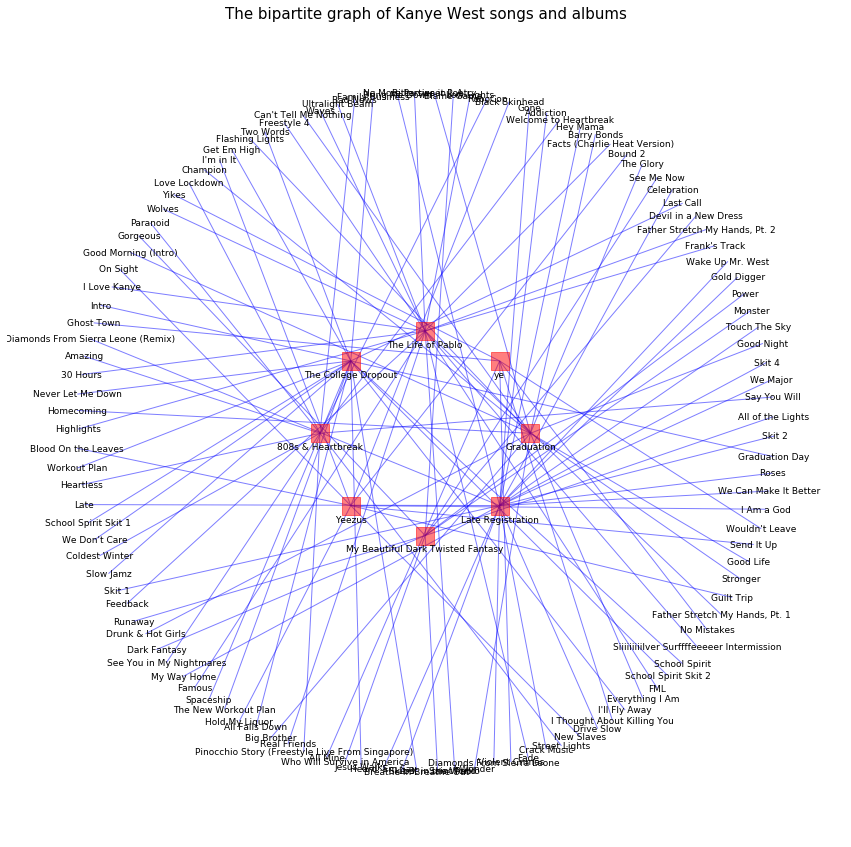

In [11]:
figsize=(15,15)

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=list(albums),node_color="r",node_shape='s',alpha=0.5)#"#ffb3b3"
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=list(songs),node_size=0,node_color="g",node_shape='o',alpha=0.5)#"#b3ffb3"
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.04  # offset on the y axis
for k, v in pos.items():
    if k in albums:
        yoffset[k] = (v[0], v[1]+y_off)
    else:
        yoffset[k] = v
nx.draw_networkx_labels(H, yoffset,font_size=9);
sst="The bipartite graph of %s songs and albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### 1.2. The intersection graph of albums in the songs that they contain

In [12]:
aed=[]
for a1 in albums:
    for a2 in albums:
        if a2!=a1:
            t=[]
            for s in songs:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting albums containing common songs has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))

The graph HA connecting albums containing common songs has: 
 0 nodes and 0 edges
Is HA weighted? False


In [13]:
# no co-occurent songs in albums

# weight=nx.get_edge_attributes(HA,'weight')
# weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
# weight_list

# cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
# edge_color=weight_list
# vmin = min(edge_color) 
# vmax = max(edge_color) 
# width_list=[0.6*w for w in weight_list] # [math.log(1+w) for w in weight_list]

# plt.figure(figsize=(10,7));
# pos = nx.spring_layout(HA, k=15, iterations=200) #graphviz_layout(HA)
# node_border_color='k'
# nodes = nx.draw_networkx_nodes(HA, pos=pos,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
# nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
# # nx.draw_networkx_edge_labels(HA,pos=pos,edge_labels=weight);
# plt.axis('off');
# yoffset = {}
# y_off = -0.08  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(HA, yoffset);
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm.set_array([])
# cbar = plt.colorbar(sm,label="Common Songs") #, orientation='horizontal')
# plt.tight_layout(-5)
# sst="The intersection graph of %s albums" %artist
# plt.title(sst,fontsize=15);
# plt.margins(x=0.2, y=0.1) 

### 1.3. The graph of co-occurring songs in the albums

In [14]:
aed=[]
for a1 in songs:
    for a2 in songs:
        if a2!=a1:
            t=[]
            for s in albums:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting songs co-occurring in albums has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))
      

The graph HA connecting songs co-occurring in albums has: 
 116 nodes and 884 edges
Is HA weighted? True


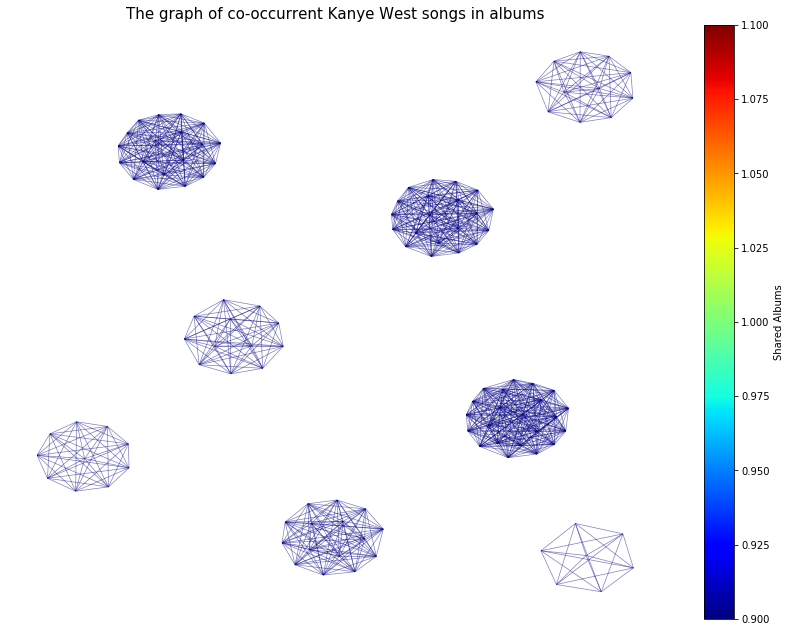

In [15]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

plt.figure(figsize=(10,7));
pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);

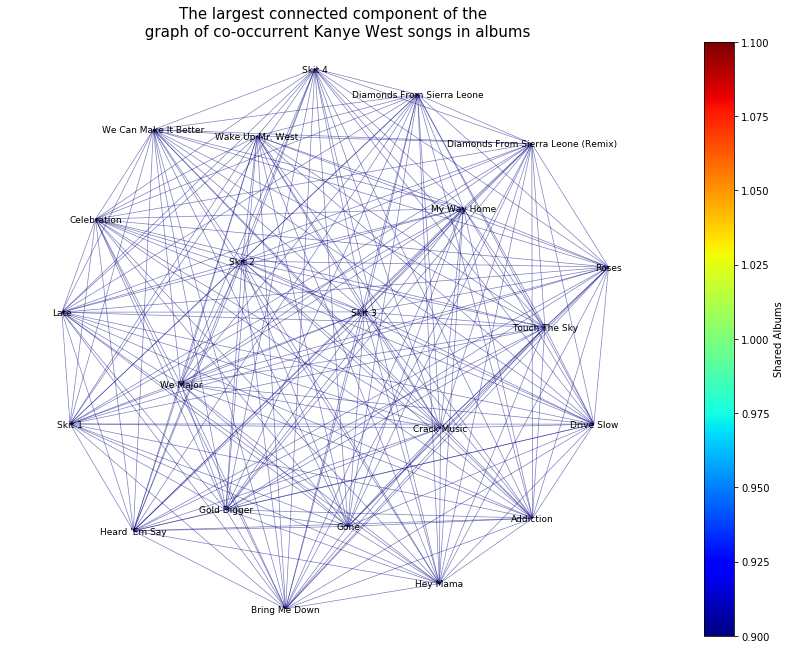

In [16]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

giant = max(connected_component_subgraphs(HA), key=len)
plt.figure(figsize=(10,7));
HA=giant
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset,font_size=9,);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The largest connected component of the \n graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 

In [17]:
artist_name_saved = artist.replace(' ','_')
ldf.to_csv(artist_name_saved+'_discography.csv',index=False)

In [18]:
ldf1 = pd.read_csv(artist_name_saved+'_discography.csv') #,encoding='utf-8',index=False
# ldf1 = ldf1[['artist', 'lyric', 'song', 'year', 'album', 'id', 'genre',
#        'album_genre']]
ldf1

song                              album  year  \
0                       30 Hours                  The Life of Pablo  2016   
1                      Addiction                  Late Registration  2005   
2                 All Falls Down                The College Dropout  2004   
3                       All Mine                                 ye  2018   
4              All of the Lights  My Beautiful Dark Twisted Fantasy  2010   
..                           ...                                ...   ...   
111  Who Will Survive in America  My Beautiful Dark Twisted Fantasy  2010   
112                       Wolves                  The Life of Pablo  2016   
113                 Workout Plan                The College Dropout  2004   
114               Wouldn't Leave                                 ye  2018   
115                        Yikes                                 ye  2018   

                                       albumy  \
0                    The Life of Pablo (2016)   
1                    Late Registration (2005)   
2                  The College Dropout (2004)   
3                                   ye (2018)   
4    My Beautiful Dark Twisted Fantasy (2010)   
..                                        ...   
111  My Beautiful Dark Twisted Fantasy (2010)   
112                  The Life of Pablo (2016)   
113                The College Dropout (2004)   
114                                 ye (2018)   
115                                 ye (2018)   

                                                 lyric  
0    Baby lion goes Where the islands go You say yo...  
1    You make me smile in my heart, oh Why everythi...  
2    Oh when it all, it all falls down (Yeah, this ...  
3    Yeah, you supermodel thick Damn, that ass bust...  
4    All of the lights, all of the lights Lights, l...  
..                                                 ...  
111  Us living as we do upside down. And the new wo...  
112  Lost out, beat up Dancin', down there I found ...  
113  Ay what's up girl? (Hey girl) (Hey, how you do...  
114  I don't feel that she's mine enough God, I fee...  
115  Shit could get menacin', frightenin', find hel...  

[116 rows x 5 columns]

In [19]:
songs1 = sorted(set(ldf1.song.tolist()))
print(len(songs1),len(ldf1))
songs1

116 116


['30 Hours',
 'Addiction',
 'All Falls Down',
 'All Mine',
 'All of the Lights',
 'Amazing',
 'Bad News',
 'Barry Bonds',
 'Big Brother',
 'Bittersweet Poetry',
 'Black Skinhead',
 'Blame Game',
 'Blood On the Leaves',
 'Bound 2',
 'Breathe In Breathe Out',
 'Bring Me Down',
 "Can't Tell Me Nothing",
 'Celebration',
 'Champion',
 'Coldest Winter',
 'Crack Music',
 'Dark Fantasy',
 'Devil in a New Dress',
 'Diamonds From Sierra Leone',
 'Diamonds From Sierra Leone (Remix)',
 'Drive Slow',
 'Drunk & Hot Girls',
 'Everything I Am',
 'FML',
 'Facts (Charlie Heat Version)',
 'Fade',
 'Family Business',
 'Famous',
 'Father Stretch My Hands, Pt. 1',
 'Father Stretch My Hands, Pt. 2',
 'Feedback',
 'Flashing Lights',
 "Frank's Track",
 'Freestyle 4',
 'Get Em High',
 'Ghost Town',
 'Gold Digger',
 'Gone',
 'Good Life',
 'Good Morning (Intro)',
 'Good Night',
 'Gorgeous',
 'Graduation Day',
 'Guilt Trip',
 "Heard 'Em Say",
 'Heartless',
 'Hey Mama',
 'Highlights',
 'Hold My Liquor',
 'Homecomin

In [20]:
docs_d = {}
for i in range(len(ldf1)):
    a = artist_name_saved
    b = ldf1.iloc[i]['lyric']
    c = ldf1.iloc[i]['song']
    if c in songs1:
        docs_d[c] = (a,b)

In [21]:
# for k,v in docs_d.items():
#     print(k,v)

In [22]:
#  don't empty docs_d, keep adding to it with other artists
# n = 2 or 3 or 4 depending on the artist
# for i in range(len(ldfn)):
#     a = "X" x being the name of artist
#     b = ldf1.iloc[i]['lyric']
#     c = ldf1.iloc[i]['song']
#     if c in songsn:
#         docs_d[c] = (a,b)

### 2 Kid Cudi

In [23]:
artist='Kid Cudi'
songs = get_lyrics(artist)
print(len(songs))
songs[0]

https://lyrics.wikia.com/wiki/Special:Search?query=Kid+Cudi
/wiki/Kid_Cudi:Intro
/wiki/Kid_Cudi:Down_%26_Out
/wiki/Kid_Cudi:Is_There_Any_Love%3F
/wiki/Kid_Cudi:Cudi_Get
/wiki/Kid_Cudi:Man_On_The_Moon_(The_Anthem)
/wiki/Kid_Cudi:The_Prayer
/wiki/Kid_Cudi:Day_%27N%27_Nite_(Nightmare)
/wiki/Crookers:Embrace_The_Martian
/wiki/Kid_Cudi:Maui_Wowie
/wiki/Kid_Cudi:50_Ways_To_Make_A_Record
/wiki/Kid_Cudi:Whenever
/wiki/Kid_Cudi:Pillow_Talk
/wiki/Kid_Cudi:Save_My_Soul_(The_Cudi_Confession)
/wiki/Kid_Cudi:T.G.I.F.
/wiki/Kid_Cudi:Cudi_Spazzin%27
/wiki/Kid_Cudi:Cleveland_Is_The_Reason
/wiki/Kid_Cudi:Heaven_At_Nite
/wiki/Kid_Cudi:In_My_Dreams_(Cudder_Anthem)
/wiki/Kid_Cudi:Soundtrack_2_My_Life
/wiki/Kid_Cudi:Simple_As...
/wiki/Kid_Cudi:Solo_Dolo_(Nightmare)
/wiki/Kid_Cudi:Heart_Of_A_Lion_(Kid_Cudi_Theme_Music)
/wiki/Kid_Cudi:My_World
/wiki/Kid_Cudi:Day_%27N%27_Nite_(Nightmare)
/wiki/Kid_Cudi:Sky_Might_Fall
/wiki/Kid_Cudi:Enter_Galactic_(Love_Connection_Part_I)
/wiki/Kid_Cudi:Alive_(Nightmare)
/wiki/

{'artist': 'Kid Cudi',
 'lyric': 'This is my story, this is my song',
 'song': 'Down & Out',
 'year': '2008',
 'album': 'A Kid Named Cudi (2008)',
 'id': 16487,
 'genre': '',
 'album_genre': ''}

In [24]:
sdf = pd.DataFrame(songs)
group = ['song', 'year', 'album', 'genre', 'artist']
ldf = sdf.sort_values(group)\
       .groupby(group).lyric\
       .apply(' '.join)\
       .reset_index(name='lyric')
print(len(ldf)) 
ldf.rename(columns={'album': 'albumy'}, inplace=True)
ldf.columns
alb=[]
for i in range(len(ldf)):
    alb.append(ldf.iloc[i]['albumy'][:-7])
ldf['album']=alb
# ldf=ldf.drop('albumy', axis=1)
ldf=ldf.drop('genre', axis=1)
ldf=ldf.drop('artist', axis=1)
ldf=ldf[["song","album","year","albumy","lyric"]]
ldf

117


song  \
0         50 Ways to Make a Record   
1                       Adventures   
2    Afterwards (Bring Yo Friends)   
3                Alive (Nightmare)   
4                        All Along   
..                             ...   
112                       Whenever   
113           Wild'n Cuz I'm Young   
114                          Worth   
115                         Wounds   
116                     Young Lady   

                                           album  year  \
0                               A Kid Named Cudi  2008   
1                       Speedin' Bullet 2 Heaven  2015   
2                                        Indicud  2013   
3                Man on the Moon: The End of Day  2009   
4    Man on the Moon II: The Legend of Mr. Rager  2010   
..                                           ...   ...   
112                             A Kid Named Cudi  2008   
113  Man on the Moon II: The Legend of Mr. Rager  2010   
114                     Speedin' Bullet 2 Heaven  2015   
115                Passion, Pain & Demon Slayin'  2016   
116                                      Indicud  2013   

                                                albumy  \
0                              A Kid Named Cudi (2008)   
1                      Speedin' Bullet 2 Heaven (2015)   
2                                       Indicud (2013)   
3               Man on the Moon: The End of Day (2009)   
4    Man on the Moon II: The Legend of Mr. Rager (2...   
..                                                 ...   
112                            A Kid Named Cudi (2008)   
113  Man on the Moon II: The Legend of Mr. Rager (2...   
114                    Speedin' Bullet 2 Heaven (2015)   
115               Passion, Pain & Demon Slayin' (2016)   
116                                     Indicud (2013)   

                                                 lyric  
0    You sit and think about,  How you can hit the ...  
1    And we're floating out to nowhere No safety, f...  
2    Sexy, sexy Gonna have us a good time and I ain...  
3    Everytime The moon shines I become alive Yeah ...  
4    Hey, um um um um mm Hey, um um um um mm When t...  
..                                                 ...  
112  Focus baby don't look at me See right through ...  
113  I be wylin' 'cause I'm young Wyl wylin 'cause ...  
114  She looks for comfort in whoever He has to hav...  
115  Wee-ooo, wee-ooo, wee-ooo, wee-ooo, wee-ooo Oh...  
116  In my head your smile appears clear Wish it wa...  

[117 rows x 5 columns]

In [25]:
lg=ldf["song"].groupby(ldf["albumy"]).count()
lg=lg.reset_index()
lg.rename(columns={'song': 'number of songs'}, inplace=True)
lg

albumy  number of songs
0                            A Kid Named Cudi (2008)               16
1                                     Indicud (2013)               16
2  Man on the Moon II: The Legend of Mr. Rager (2...               19
3             Man on the Moon: The End of Day (2009)               18
4               Passion, Pain & Demon Slayin' (2016)               15
5  Satellite Flight: The Journey to Mother Moon (...                8
6                    Speedin' Bullet 2 Heaven (2015)               25

In [26]:
albums=list(set(ldf.album.values))
year=[]
no_songs=[]
for a in albums:
    no_songs.append(len(list(set(ldf.loc[ldf['album']==a]['song'].values))))
    year.append(list(set(ldf.loc[ldf['album']==a]['year'].values))[0])
    y=' '.join(list(set(ldf.loc[ldf['album']==a]['year'].values)))
    c=[]
album = albums
lgy = pd.DataFrame(
    {'album': album,
     'year': year,
     'number of songs': no_songs
    })
lgy=lgy[["album",'year','number of songs']]
lgy.sort_values('year')

album  year  number of songs
2                              A Kid Named Cudi  2008               16
6               Man on the Moon: The End of Day  2009               18
5   Man on the Moon II: The Legend of Mr. Rager  2010               19
0                                       Indicud  2013               16
4  Satellite Flight: The Journey to Mother Moon  2014                8
3                      Speedin' Bullet 2 Heaven  2015               25
1                 Passion, Pain & Demon Slayin'  2016               15

### 2.1. The bipartite graph of songs and albums

In [27]:
sae=[]
for i in range(len(ldf)):
    s=ldf.iloc[i]['song']
    a=ldf.iloc[i]['album']
    y=ldf.iloc[i]['year']
    ly=ldf.iloc[i]['lyric']
    sae.append((s,a,y,ly))
saed=[]
for t in sae:
    year_l={'year_l':(t[2],t[3])}
    if t[0] not in ldf.album.unique():
        saed.append((t[0],t[1],year_l)) #,lyric))
    else:
        saed.append((t[0]+"_song",t[1],year_l))
saed=sorted(saed)
albums=list(set(ldf.album.values))
# songs=set(ldf.song.values)
t1=[]
t11=[]
t2=[]
for a in albums:
    for s in ldf.song.unique():
        if s==a:
            t11.append(s)
            ss=s+"_song"
            if ss not in t1:
                t1.append(ss)
for s in ldf.song.unique():
     if s not in t11:
        t2.append(s)
songs=t1+t2
for i in songs:
    if i in albums:
        print(i)
H=nx.MultiGraph()
H.add_edges_from(saed)
print("The graph H connecting the %i songs to the %i albums has: \n %i nodes and %i edges" %(len(songs),len(albums),len(H.nodes()),len(H.edges())))
print("Is H multigraph?", H.is_multigraph())
print("Is H bipartite?", nx.is_bipartite(H))

The graph H connecting the 114 songs to the 7 albums has: 
 121 nodes and 117 edges
Is H multigraph? True
Is H bipartite? True


In [28]:
pos = nx.spring_layout(H, k=15.,iterations=1000)
r=0.3 #26
Ga=nx.Graph()
Ga.add_nodes_from(albums)
posalb=nx.circular_layout(Ga)
for a in albums:
    pos[a]=(r*posalb[a][0],r*posalb[a][1])

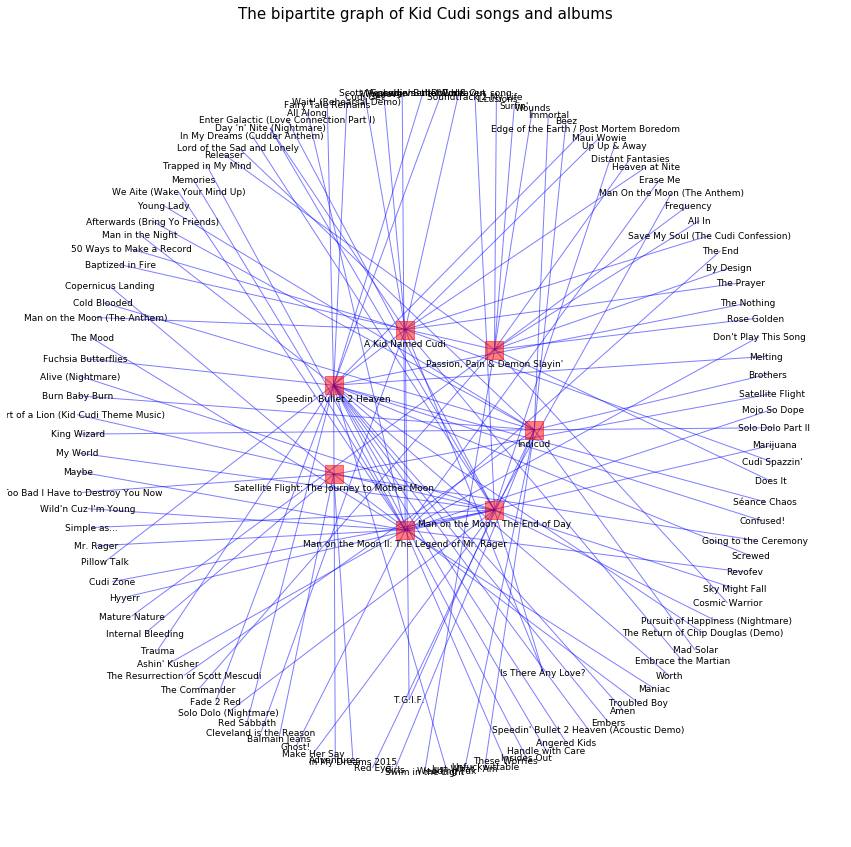

In [29]:
figsize=(15,15)

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=list(albums),node_color="r",node_shape='s',alpha=0.5)#"#ffb3b3"
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=list(songs),node_size=0,node_color="g",node_shape='o',alpha=0.5)#"#b3ffb3"
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.04  # offset on the y axis
for k, v in pos.items():
    if k in albums:
        yoffset[k] = (v[0], v[1]+y_off)
    else:
        yoffset[k] = v
nx.draw_networkx_labels(H, yoffset,font_size=9);
sst="The bipartite graph of %s songs and albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### 2.2. The intersection graph of albums in the songs that they contain

In [30]:
aed=[]
for a1 in albums:
    for a2 in albums:
        if a2!=a1:
            t=[]
            for s in songs:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting albums containing common songs has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))

The graph HA connecting albums containing common songs has: 
 2 nodes and 1 edges
Is HA weighted? True


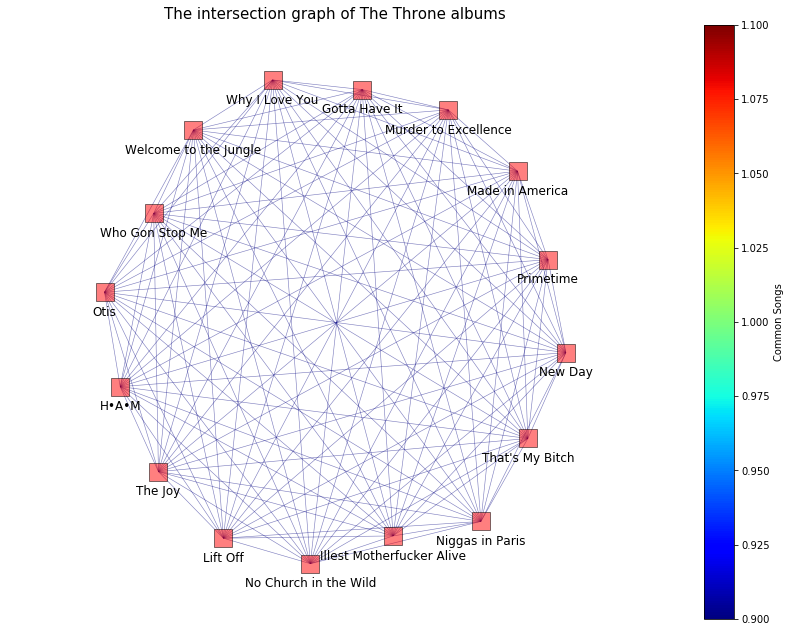

In [91]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[0.6*w for w in weight_list] # [math.log(1+w) for w in weight_list]

plt.figure(figsize=(10,7));
pos = nx.spring_layout(HA, k=15, iterations=200) #graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
# nx.draw_networkx_edge_labels(HA,pos=pos,edge_labels=weight);
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
pos['Man on the Moon: The End of Day'] = [ 1.        , 0]
nx.draw_networkx_labels(HA, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Common Songs") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The intersection graph of %s albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.2, y=0.1) 

### 2.3. The graph of co-occurring songs in the albums

In [32]:
aed=[]
for a1 in songs:
    for a2 in songs:
        if a2!=a1:
            t=[]
            for s in albums:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting songs co-occurring in albums has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))
      

The graph HA connecting songs co-occurring in albums has: 
 114 nodes and 994 edges
Is HA weighted? True


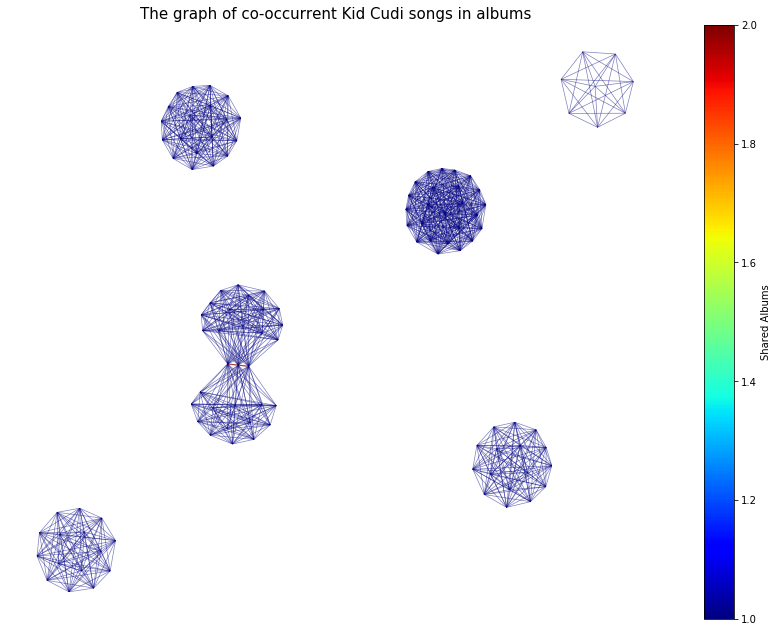

In [33]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

plt.figure(figsize=(10,7));
pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);

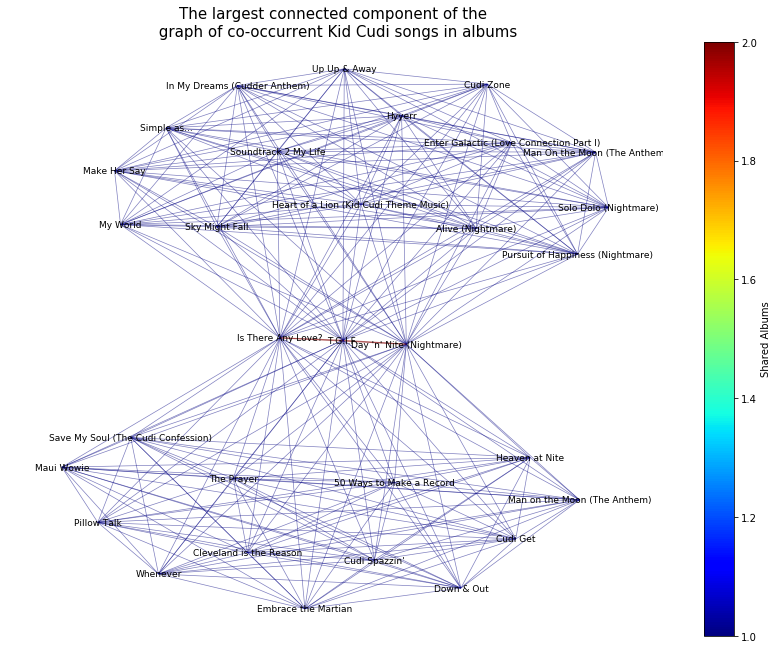

In [34]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

giant = max(connected_component_subgraphs(HA), key=len)
plt.figure(figsize=(10,7));
HA=giant
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset,font_size=9,);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The largest connected component of the \n graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 

In [35]:
artist_name_saved = artist.replace(' ','_')
ldf.to_csv(artist_name_saved+'_discography.csv',index=False)

In [36]:
ldf2 = pd.read_csv(artist_name_saved+'_discography.csv') #,encoding='utf-8',index=False
# ldf1 = ldf1[['artist', 'lyric', 'song', 'year', 'album', 'id', 'genre',
#        'album_genre']]
ldf2

song  \
0         50 Ways to Make a Record   
1                       Adventures   
2    Afterwards (Bring Yo Friends)   
3                Alive (Nightmare)   
4                        All Along   
..                             ...   
112                       Whenever   
113           Wild'n Cuz I'm Young   
114                          Worth   
115                         Wounds   
116                     Young Lady   

                                           album  year  \
0                               A Kid Named Cudi  2008   
1                       Speedin' Bullet 2 Heaven  2015   
2                                        Indicud  2013   
3                Man on the Moon: The End of Day  2009   
4    Man on the Moon II: The Legend of Mr. Rager  2010   
..                                           ...   ...   
112                             A Kid Named Cudi  2008   
113  Man on the Moon II: The Legend of Mr. Rager  2010   
114                     Speedin' Bullet 2 Heaven  2015   
115                Passion, Pain & Demon Slayin'  2016   
116                                      Indicud  2013   

                                                albumy  \
0                              A Kid Named Cudi (2008)   
1                      Speedin' Bullet 2 Heaven (2015)   
2                                       Indicud (2013)   
3               Man on the Moon: The End of Day (2009)   
4    Man on the Moon II: The Legend of Mr. Rager (2...   
..                                                 ...   
112                            A Kid Named Cudi (2008)   
113  Man on the Moon II: The Legend of Mr. Rager (2...   
114                    Speedin' Bullet 2 Heaven (2015)   
115               Passion, Pain & Demon Slayin' (2016)   
116                                     Indicud (2013)   

                                                 lyric  
0    You sit and think about,  How you can hit the ...  
1    And we're floating out to nowhere No safety, f...  
2    Sexy, sexy Gonna have us a good time and I ain...  
3    Everytime The moon shines I become alive Yeah ...  
4    Hey, um um um um mm Hey, um um um um mm When t...  
..                                                 ...  
112  Focus baby don't look at me See right through ...  
113  I be wylin' 'cause I'm young Wyl wylin 'cause ...  
114  She looks for comfort in whoever He has to hav...  
115  Wee-ooo, wee-ooo, wee-ooo, wee-ooo, wee-ooo Oh...  
116  In my head your smile appears clear Wish it wa...  

[117 rows x 5 columns]

In [37]:
songs2 = sorted(set(ldf2.song.tolist()))
print(len(songs2),len(ldf2))
songs2

114 117


['50 Ways to Make a Record',
 'Adventures',
 'Afterwards (Bring Yo Friends)',
 'Alive (Nightmare)',
 'All Along',
 'All In',
 'Amen',
 'Angered Kids',
 "Ashin' Kusher",
 'Balmain Jeans',
 'Baptized in Fire',
 'Beez',
 'Brothers',
 'Burn Baby Burn',
 'By Design',
 'Cleveland is the Reason',
 'Cold Blooded',
 'Confused!',
 'Copernicus Landing',
 'Cosmic Warrior',
 'Cudi Get',
 "Cudi Spazzin'",
 'Cudi Zone',
 "Day 'n' Nite (Nightmare)",
 'Distant Fantasies',
 'Does It',
 "Don't Play This Song",
 'Down & Out',
 'Edge of the Earth / Post Mortem Boredom',
 'Embers',
 'Embrace the Martian',
 'Enter Galactic (Love Connection Part I)',
 'Erase Me',
 'Fade 2 Red',
 'Fairy Tale Remains',
 'Frequency',
 'Fuchsia Butterflies',
 'Ghost!',
 'Girls',
 'Going to the Ceremony',
 'Handle with Care',
 'Heart of a Lion (Kid Cudi Theme Music)',
 'Heaven at Nite',
 'Hyyerr',
 'ILLusions',
 'Immortal',
 'In My Dreams (Cudder Anthem)',
 'In My Dreams 2015',
 'Insides Out',
 'Internal Bleeding',
 'Is There Any 

In [38]:
for i in range(len(ldf2)):
    a = artist_name_saved
    b = ldf2.iloc[i]['lyric']
    c = ldf2.iloc[i]['song']
    if c in songs2:
        docs_d[c] = (a,b)

In [39]:
for k,v in docs_d.items():
    print(k,v)

30 Hours ('Kanye_West', "Baby lion goes Where the islands go You say you never saw this comin', well you're not alone Million dollar renovations to a happy home My ex says she gave me the best years of her life I saw a recent picture of her, I guess she was right I wake up, assessin' the damages Checkin' MediaTakeOut Pictures of me drunk walkin' out with a bitch But it's blurry enough to get the fake out I wake up, all veggies no eggs I hit the gym, all chest no legs Yep, then I made myself a smoothie Yeah, then me and wifey make a movie Chicago - St. Louis, St. Louis to Chicago Ándale Ándale E.I, E.I, uh, oh You had me drivin' far enough to switch the time zone You was the best of all time at the time though Yeah, you wasn't mine though But I still drove 30 hours But still drove 30 hours to you I remember rapping for Jay and Cam Young producer just trying to get his flows off I remember being nervous to do Victoria Secret Till I pictured everybody with they clothes off Expedition was 

### 3. Jay-Z

In [40]:
artist='Jay-Z'
songs = get_lyrics(artist)
print(len(songs))
songs[0]

https://lyrics.wikia.com/wiki/Special:Search?query=Jay-Z
/wiki/Jay-Z:Can%27t_Knock_The_Hustle
/wiki/Jay-Z:Politics_As_Usual
/wiki/Jay-Z:Brooklyn%27s_Finest
/wiki/Jay-Z:Dead_Presidents_II
/wiki/Jay-Z:Feelin%27_It
/wiki/Jay-Z:D%27Evils
/wiki/Jay-Z:22_Two%27s
/wiki/Jay-Z:Can_I_Live
/wiki/Jay-Z:Ain%27t_No_Nigga
/wiki/Jay-Z:Friend_Or_Foe
/wiki/Jay-Z:Coming_Of_Age
/wiki/Jay-Z:Cashmere_Thoughts
/wiki/Jay-Z:Bring_It_On
/wiki/Jay-Z:Regrets
/wiki/Jay-Z:Can_I_Live_II
/wiki/Jay-Z:Can%27t_Knock_The_Hustle_(Fool%27s_Paradise_Remix)
/wiki/Jay-Z:Intro/A_Million_And_One_Questions/Rhyme_No_More
/wiki/Jay-Z:The_City_Is_Mine
/wiki/Jay-Z:I_Know_What_Girls_Like
/wiki/Jay-Z:Imaginary_Player
/wiki/Jay-Z:Streets_Is_Watching
/wiki/Jay-Z:Friend_Or_Foe_%2798
/wiki/Jay-Z:Lucky_Me
/wiki/Jay-Z:(Always_Be_My)_Sunshine
/wiki/Jay-Z:Who_You_Wit_II
/wiki/Jay-Z:Face_Off
/wiki/Jay-Z:Real_Niggaz
/wiki/Jay-Z:Rap_Game/Crack_Game
/wiki/Jay-Z:Where_I%27m_From
/wiki/Jay-Z:You_Must_Love_Me
/wiki/Jay-Z:Hand_It_Down_(Intro)
/wiki/J

{'artist': 'Jay-Z',
 'lyric': "I'm makin' sure it turns gold, when the weather folds,",
 'song': "Can't Knock the Hustle",
 'year': '1996',
 'album': 'Reasonable Doubt (1996)',
 'id': 27949,
 'genre': '',
 'album_genre': ''}

In [41]:
sdf = pd.DataFrame(songs)
group = ['song', 'year', 'album', 'genre', 'artist']
ldf = sdf.sort_values(group)\
       .groupby(group).lyric\
       .apply(' '.join)\
       .reset_index(name='lyric')
print(len(ldf)) 
ldf.rename(columns={'album': 'albumy'}, inplace=True)
ldf.columns
alb=[]
for i in range(len(ldf)):
    alb.append(ldf.iloc[i]['albumy'][:-7])
ldf['album']=alb
# ldf=ldf.drop('albumy', axis=1)
ldf=ldf.drop('genre', axis=1)
ldf=ldf.drop('artist', axis=1)
ldf=ldf[["song","album","year","albumy","lyric"]]
ldf

256


song                                 album  year  \
0         '03 Bonnie & Clyde  The Blueprint²: The Gift & the Curse  2002   
1    (Always Be My) Sunshine                In My Lifetime, Vol. 1  1997   
2              1-900-Hustler           The Dynasty: Roc La Familia  2000   
3                2 Many Hoes  The Blueprint²: The Gift & the Curse  2002   
4                   22 Two's                      Reasonable Doubt  1996   
..                       ...                                   ...   ...   
251           Who You Wit II                In My Lifetime, Vol. 1  1997   
252           Why I Love You                      Watch the Throne  2011   
253         You Must Love Me                In My Lifetime, Vol. 1  1997   
254     You, Me, Him and Her           The Dynasty: Roc La Familia  2000   
255            Young Forever                       The Blueprint 3  2009   

                                          albumy  \
0    The Blueprint²: The Gift & the Curse (2002)   
1                  In My Lifetime, Vol. 1 (1997)   
2             The Dynasty: Roc La Familia (2000)   
3    The Blueprint²: The Gift & the Curse (2002)   
4                        Reasonable Doubt (1996)   
..                                           ...   
251                In My Lifetime, Vol. 1 (1997)   
252                      Watch the Throne (2011)   
253                In My Lifetime, Vol. 1 (1997)   
254           The Dynasty: Roc La Familia (2000)   
255                       The Blueprint 3 (2009)   

                                                 lyric  
0    Uh uh uh You ready B? Let's go get 'em... Look...  
1    (Jay-Z) What, tssh, y'all, what Jigga, uh uh u...  
2    (Beanie Sigel) 1-900-Hustler, Sigel, holla at ...  
3    Uh, yeah, uh-uh-uh Uh-huh, uh-uh-uh, uh, uh I ...  
4    Yo, what's up everybody This is Marie Davis, "...  
..                                                 ...  
251  Uh-huh, yeah hah Never sprung huh? Jigga, Roc-...  
252  Ooh, I love you so But why I love you, I'll ne...  
253  Kelly Price (Jay-Z) Talking: Throughout my lif...  
254  Told y'all... Dynasty... Roc-A-Fella Records, ...  
255  Let's dance in style Let's dance for a while H...  

[256 rows x 5 columns]

In [42]:
# Removing Watch The Throne as it is a supergroup album, which we will be analyzing later
# Removing Collision Course as it is a collaboration with Linkin Park and all its songs are in other albums in Jay-Z's discography

# Getting Watch The Throne separately
throne_ldf = ldf[ldf.album == "Watch the Throne"]

# Removing Watch the Throne and Collision Course
ldf = ldf[ldf.album != "Watch the Throne"]
ldf = ldf[ldf.album != "Collision Course"]

throne_ldf

song             album  year  \
87               Gotta Have It  Watch the Throne  2011   
106                      H•A•M  Watch the Throne  2011   
115  Illest Motherfucker Alive  Watch the Throne  2011   
136                   Lift Off  Watch the Throne  2011   
140            Made in America  Watch the Throne  2011   
149       Murder to Excellence  Watch the Throne  2011   
155                    New Day  Watch the Throne  2011   
159            Niggas in Paris  Watch the Throne  2011   
160      No Church in the Wild  Watch the Throne  2011   
168                       Otis  Watch the Throne  2011   
180                  Primetime  Watch the Throne  2011   
218            That's My Bitch  Watch the Throne  2011   
221                    The Joy  Watch the Throne  2011   
242      Welcome to the Jungle  Watch the Throne  2011   
250            Who Gon Stop Me  Watch the Throne  2011   
252             Why I Love You  Watch the Throne  2011   

                      albumy  \
87   Watch the Throne (2011)   
106  Watch the Throne (2011)   
115  Watch the Throne (2011)   
136  Watch the Throne (2011)   
140  Watch the Throne (2011)   
149  Watch the Throne (2011)   
155  Watch the Throne (2011)   
159  Watch the Throne (2011)   
160  Watch the Throne (2011)   
168  Watch the Throne (2011)   
180  Watch the Throne (2011)   
218  Watch the Throne (2011)   
221  Watch the Throne (2011)   
242  Watch the Throne (2011)   
250  Watch the Throne (2011)   
252  Watch the Throne (2011)   

                                                 lyric  
87   Turn my headphones up Louder Uh-huh, uh-huh Wh...  
106  (Verse 1: Kanye West) It was all good just a w...  
115  *3 Minute Pause* (Intro: Kanye West) 1985 whit...  
136  All engine running We gon' take it to the moon...  
140  It'll bring you out the, out the darkness Swee...  
149  Uh, bloody murder, murder, murder Bloody murde...  
155  Yeah, uh (Sun in the sky, you know how I feel)...  
159  We're gonna skate to one song, one song only B...  
160  Human beings in a mob What's a mob to a king? ...  
168  It makes it easier, easier to bear You won't r...  
180  (Intro: Jay-Z) We in the time of our lives, ba...  
218  Hello, can I speak to, uh Yeah, you know who y...  
221  A little sugar, honey suckle lamb A grave expr...  
242  Uh Right Oh Oh Right One, two (Yeah), one, two...  
250  I can't stop I can't stop This is something li...  
252  Ooh, I love you so But why I love you, I'll ne...

In [43]:
lg=ldf["song"].groupby(ldf["albumy"]).count()
lg=lg.reset_index()
lg.rename(columns={'song': 'number of songs'}, inplace=True)
lg

albumy  number of songs
0                                    4:44 (2017)               10
1                       American Gangster (2007)               15
2                  In My Lifetime, Vol. 1 (1997)               13
3                            Kingdom Come (2006)               15
4               Magna Carta... Holy Grail (2013)               17
5                        Reasonable Doubt (1996)               16
6                 The Best of Both Worlds (2002)               13
7                         The Black Album (2003)               14
8                           The Blueprint (2001)               14
9                         The Blueprint 3 (2009)               23
10   The Blueprint²: The Gift & the Curse (2002)               25
11            The Dynasty: Roc La Familia (2000)               16
12                    Unfinished Business (2004)               11
13              Vol. 2... Hard Knock Life (1998)               14
14  Vol. 3... Life and Times of S. Carter (1999)               18

In [44]:
albums=list(set(ldf.album.values))
year=[]
no_songs=[]
for a in albums:
    no_songs.append(len(list(set(ldf.loc[ldf['album']==a]['song'].values))))
    year.append(list(set(ldf.loc[ldf['album']==a]['year'].values))[0])
    y=' '.join(list(set(ldf.loc[ldf['album']==a]['year'].values)))
    c=[]
album = albums
lgy = pd.DataFrame(
    {'album': album,
     'year': year,
     'number of songs': no_songs
    })
lgy=lgy[["album",'year','number of songs']]
lgy.sort_values('year')

album  year  number of songs
4                        Reasonable Doubt  1996               16
12                 In My Lifetime, Vol. 1  1997               13
5               Vol. 2... Hard Knock Life  1998               14
6   Vol. 3... Life and Times of S. Carter  1999               18
14            The Dynasty: Roc La Familia  2000               16
3                           The Blueprint  2001               14
0                 The Best of Both Worlds  2002               13
2    The Blueprint²: The Gift & the Curse  2002               25
9                         The Black Album  2003               14
7                     Unfinished Business  2004               11
8                            Kingdom Come  2006               15
10                      American Gangster  2007               15
13                        The Blueprint 3  2009               23
1               Magna Carta... Holy Grail  2013               17
11                                   4:44  2017               10

### 3.1. The bipartite graph of songs and albums

In [45]:
sae=[]
for i in range(len(ldf)):
    s=ldf.iloc[i]['song']
    a=ldf.iloc[i]['album']
    y=ldf.iloc[i]['year']
    ly=ldf.iloc[i]['lyric']
    sae.append((s,a,y,ly))
saed=[]
for t in sae:
    year_l={'year_l':(t[2],t[3])}
    if t[0] not in ldf.album.unique():
        saed.append((t[0],t[1],year_l)) #,lyric))
    else:
        saed.append((t[0]+"_song",t[1],year_l))
saed=sorted(saed)
albums=list(set(ldf.album.values))
# songs=set(ldf.song.values)
t1=[]
t11=[]
t2=[]
for a in albums:
    for s in ldf.song.unique():
        if s==a:
            t11.append(s)
            ss=s+"_song"
            if ss not in t1:
                t1.append(ss)
for s in ldf.song.unique():
     if s not in t11:
        t2.append(s)
songs=t1+t2
for i in songs:
    if i in albums:
        print(i)
H=nx.MultiGraph()
H.add_edges_from(saed)
print("The graph H connecting the %i songs to the %i albums has: \n %i nodes and %i edges" %(len(songs),len(albums),len(H.nodes()),len(H.edges())))
print("Is H multigraph?", H.is_multigraph())
print("Is H bipartite?", nx.is_bipartite(H))

The graph H connecting the 232 songs to the 15 albums has: 
 247 nodes and 234 edges
Is H multigraph? True
Is H bipartite? True


In [46]:
pos = nx.spring_layout(H, k=15.,iterations=1000)
r=0.3 #26
Ga=nx.Graph()
Ga.add_nodes_from(albums)
posalb=nx.circular_layout(Ga)
for a in albums:
    pos[a]=(r*posalb[a][0],r*posalb[a][1])

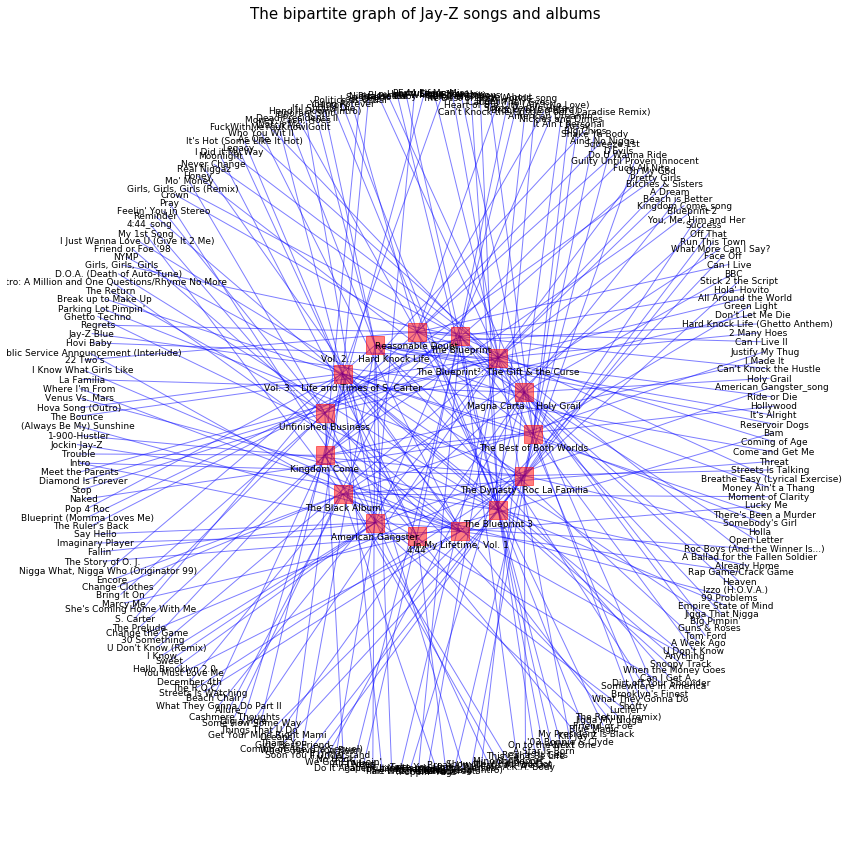

In [47]:
figsize=(15,15)

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=list(albums),node_color="r",node_shape='s',alpha=0.5)#"#ffb3b3"
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=list(songs),node_size=0,node_color="g",node_shape='o',alpha=0.5)#"#b3ffb3"
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.04  # offset on the y axis
for k, v in pos.items():
    if k in albums:
        yoffset[k] = (v[0], v[1]+y_off)
    else:
        yoffset[k] = v
nx.draw_networkx_labels(H, yoffset,font_size=9);
sst="The bipartite graph of %s songs and albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### 3.2. The intersection graph of albums in the songs that they contain

In [48]:
aed=[]
for a1 in albums:
    for a2 in albums:
        if a2!=a1:
            t=[]
            for s in songs:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting albums containing common songs has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))

The graph HA connecting albums containing common songs has: 
 4 nodes and 2 edges
Is HA weighted? True


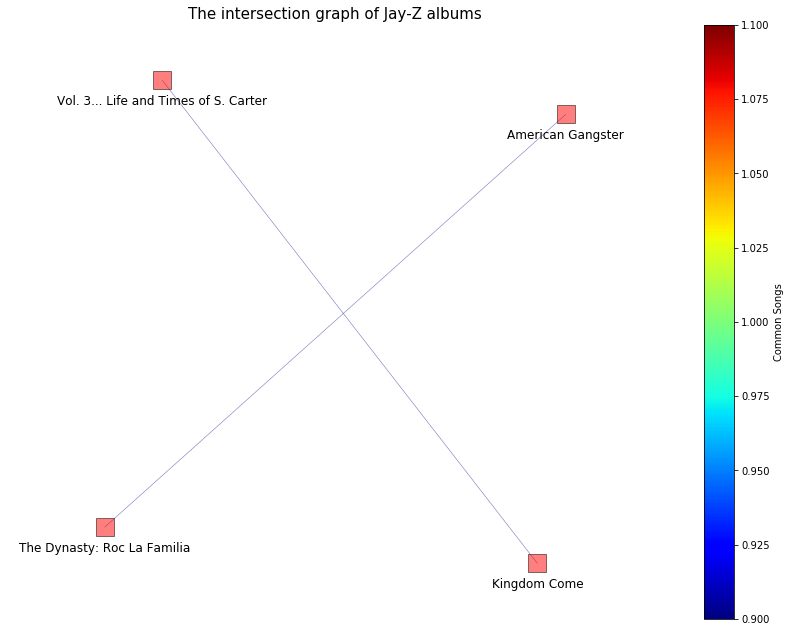

In [49]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[0.6*w for w in weight_list] # [math.log(1+w) for w in weight_list]

plt.figure(figsize=(10,7));
pos = nx.spring_layout(HA, k=15, iterations=200) #graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
# nx.draw_networkx_edge_labels(HA,pos=pos,edge_labels=weight);
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
pos['Man on the Moon: The End of Day'] = [ 1.        , -0.3897709]
nx.draw_networkx_labels(HA, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Common Songs") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The intersection graph of %s albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.2, y=0.1) 

### 3.3. The graph of co-occurring songs in the albums

In [50]:
aed=[]
for a1 in songs:
    for a2 in songs:
        if a2!=a1:
            t=[]
            for s in albums:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting songs co-occurring in albums has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))
      

The graph HA connecting songs co-occurring in albums has: 
 232 nodes and 1821 edges
Is HA weighted? True


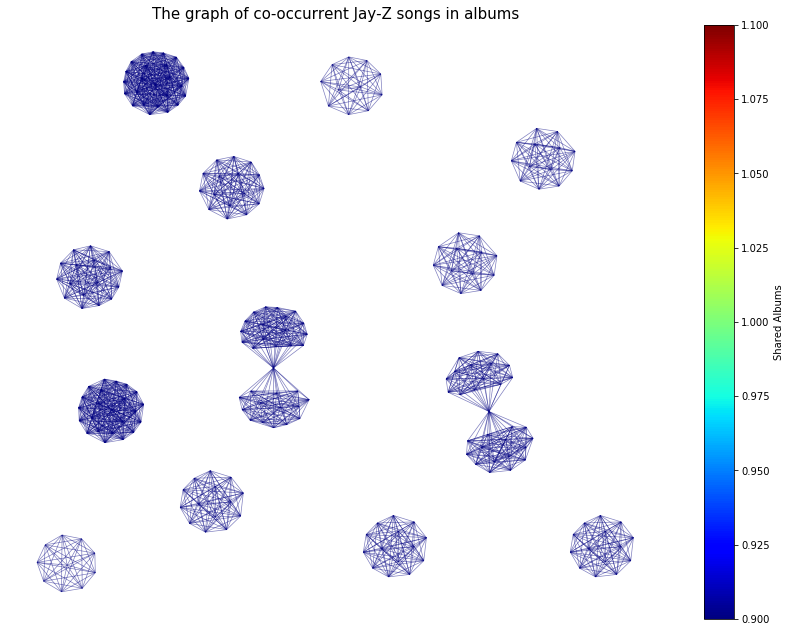

In [51]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

plt.figure(figsize=(10,7));
pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);

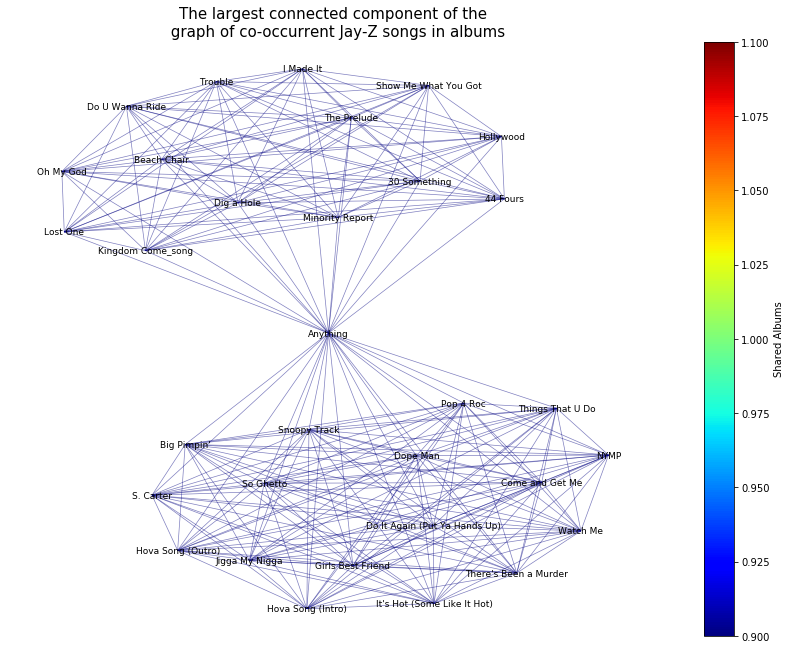

In [52]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

giant = max(connected_component_subgraphs(HA), key=len)
plt.figure(figsize=(10,7));
HA=giant
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset,font_size=9,);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The largest connected component of the \n graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 

In [53]:
artist_name_saved = artist.replace(' ','_')
ldf.to_csv(artist_name_saved+'_discography.csv',index=False)

In [54]:
ldf3 = pd.read_csv(artist_name_saved+'_discography.csv') 
ldf3

song                                 album  year  \
0         '03 Bonnie & Clyde  The Blueprint²: The Gift & the Curse  2002   
1    (Always Be My) Sunshine                In My Lifetime, Vol. 1  1997   
2              1-900-Hustler           The Dynasty: Roc La Familia  2000   
3                2 Many Hoes  The Blueprint²: The Gift & the Curse  2002   
4                   22 Two's                      Reasonable Doubt  1996   
..                       ...                                   ...   ...   
229           Where I'm From                In My Lifetime, Vol. 1  1997   
230           Who You Wit II                In My Lifetime, Vol. 1  1997   
231         You Must Love Me                In My Lifetime, Vol. 1  1997   
232     You, Me, Him and Her           The Dynasty: Roc La Familia  2000   
233            Young Forever                       The Blueprint 3  2009   

                                          albumy  \
0    The Blueprint²: The Gift & the Curse (2002)   
1                  In My Lifetime, Vol. 1 (1997)   
2             The Dynasty: Roc La Familia (2000)   
3    The Blueprint²: The Gift & the Curse (2002)   
4                        Reasonable Doubt (1996)   
..                                           ...   
229                In My Lifetime, Vol. 1 (1997)   
230                In My Lifetime, Vol. 1 (1997)   
231                In My Lifetime, Vol. 1 (1997)   
232           The Dynasty: Roc La Familia (2000)   
233                       The Blueprint 3 (2009)   

                                                 lyric  
0    Uh uh uh You ready B? Let's go get 'em... Look...  
1    (Jay-Z) What, tssh, y'all, what Jigga, uh uh u...  
2    (Beanie Sigel) 1-900-Hustler, Sigel, holla at ...  
3    Uh, yeah, uh-uh-uh Uh-huh, uh-uh-uh, uh, uh I ...  
4    Yo, what's up everybody This is Marie Davis, "...  
..                                                 ...  
229  Verse One: I'm from where the hammers rung, Ne...  
230  Uh-huh, yeah hah Never sprung huh? Jigga, Roc-...  
231  Kelly Price (Jay-Z) Talking: Throughout my lif...  
232  Told y'all... Dynasty... Roc-A-Fella Records, ...  
233  Let's dance in style Let's dance for a while H...  

[234 rows x 5 columns]

In [55]:
songs3 = sorted(set(ldf3.song.tolist()))
print(len(songs3),len(ldf3))
songs3

232 234


["'03 Bonnie & Clyde",
 '(Always Be My) Sunshine',
 '1-900-Hustler',
 '2 Many Hoes',
 "22 Two's",
 '30 Something',
 '44 Fours',
 '4:44',
 '99 Problems',
 'A Ballad for the Fallen Soldier',
 'A Dream',
 'A Star Is Born',
 'A Week Ago',
 'Adnis',
 "Ain't I",
 "Ain't No Nigga",
 'All Around the World',
 'All I Need',
 'Allure',
 'Already Home',
 "American Dreamin'",
 'American Gangster',
 'Anything',
 'As One',
 'BBC',
 'Bam',
 'Beach Chair',
 'Beach is Better',
 'Big Chips',
 "Big Pimpin'",
 'Bitches & Sisters',
 'Blow the Whistle',
 'Blue Magic',
 'Blueprint (Momma Loves Me)',
 'Blueprint 2',
 "Break Up (That's All We Do)",
 'Break up to Make Up',
 'Breathe Easy (Lyrical Exercise)',
 'Bring It On',
 "Brooklyn's Finest",
 'Brookyln (Go Hard)',
 'Can I Get A...',
 'Can I Live',
 'Can I Live II',
 "Can't Knock the Hustle",
 "Can't Knock the Hustle (Fool's Paradise Remix)",
 'Cashmere Thoughts',
 'Caught Their Eyes',
 'Change Clothes',
 'Change the Game',
 'Come and Get Me',
 'Coming of Age

In [56]:
for i in range(len(ldf3)):
    a = artist_name_saved
    b = ldf3.iloc[i]['lyric']
    c = ldf3.iloc[i]['song']
    if c in songs3:
        docs_d[c] = (a,b)

### 4. Kids See Ghosts (Kanye West and Kid Cudi)

In [57]:
artist='Kids See Ghosts'
songs = get_lyrics(artist)
print(len(songs))
songs[0]

https://lyrics.wikia.com/wiki/Special:Search?query=Kids+See+Ghosts
/wiki/Kids_See_Ghosts:Feel_The_Love
/wiki/Kids_See_Ghosts:Fire
/wiki/Kids_See_Ghosts:4th_Dimension
/wiki/Kids_See_Ghosts:Freeee_(Ghost_Town,_Pt._2)
/wiki/Kids_See_Ghosts:Reborn
/wiki/Kids_See_Ghosts:Kids_See_Ghosts
/wiki/Kids_See_Ghosts:Cudi_Montage
379


{'artist': 'Kids See Ghosts',
 'lyric': 'I can still feel the love',
 'song': 'Feel the Love',
 'year': '2018',
 'album': 'Kids See Ghosts (2018)',
 'id': 66597,
 'genre': '',
 'album_genre': ''}

In [58]:
sdf = pd.DataFrame(songs)
group = ['song', 'year', 'album', 'genre', 'artist']
ldf = sdf.sort_values(group)\
       .groupby(group).lyric\
       .apply(' '.join)\
       .reset_index(name='lyric')
print(len(ldf)) 
ldf.rename(columns={'album': 'albumy'}, inplace=True)
ldf.columns
alb=[]
for i in range(len(ldf)):
    alb.append(ldf.iloc[i]['albumy'][:-7])
ldf['album']=alb
# ldf=ldf.drop('albumy', axis=1)
ldf=ldf.drop('genre', axis=1)
ldf=ldf.drop('artist', axis=1)
ldf=ldf[["song","album","year","albumy","lyric"]]
ldf

7


song            album  year                  albumy  \
0               4th Dimension  Kids See Ghosts  2018  Kids See Ghosts (2018)   
1                Cudi Montage  Kids See Ghosts  2018  Kids See Ghosts (2018)   
2               Feel the Love  Kids See Ghosts  2018  Kids See Ghosts (2018)   
3                        Fire  Kids See Ghosts  2018  Kids See Ghosts (2018)   
4  Freeee (Ghost Town, Pt. 2)  Kids See Ghosts  2018  Kids See Ghosts (2018)   
5             Kids See Ghosts  Kids See Ghosts  2018  Kids See Ghosts (2018)   
6                      Reborn  Kids See Ghosts  2018  Kids See Ghosts (2018)   

                                               lyric  
0  "Down the chimney, he will come With his great...  
1  Find my back in the cold Trapped in another so...  
2  I can still feel the love I can still feel the...  
3  I love all your shit talkin', I love all your ...  
4  May I say something to you to give you a true ...  
5  Kids see ghosts sometimes Kids see ghosts some...  
6  I'm so-I'm so reborn, I'm movin' forward Keep ...

In [59]:
lg=ldf["song"].groupby(ldf["albumy"]).count()
lg=lg.reset_index()
lg.rename(columns={'song': 'number of songs'}, inplace=True)
lg

albumy  number of songs
0  Kids See Ghosts (2018)                7

In [60]:
albums=list(set(ldf.album.values))
year=[]
no_songs=[]
for a in albums:
    no_songs.append(len(list(set(ldf.loc[ldf['album']==a]['song'].values))))
    year.append(list(set(ldf.loc[ldf['album']==a]['year'].values))[0])
    y=' '.join(list(set(ldf.loc[ldf['album']==a]['year'].values)))
    c=[]
album = albums
lgy = pd.DataFrame(
    {'album': album,
     'year': year,
     'number of songs': no_songs
    })
lgy=lgy[["album",'year','number of songs']]
lgy.sort_values('year')

album  year  number of songs
0  Kids See Ghosts  2018                7

### 4.1. The bipartite graph of songs and albums

In [61]:
sae=[]
for i in range(len(ldf)):
    s=ldf.iloc[i]['song']
    a=ldf.iloc[i]['album']
    y=ldf.iloc[i]['year']
    ly=ldf.iloc[i]['lyric']
    sae.append((s,a,y,ly))
saed=[]
for t in sae:
    year_l={'year_l':(t[2],t[3])}
    if t[0] not in ldf.album.unique():
        saed.append((t[0],t[1],year_l)) #,lyric))
    else:
        saed.append((t[0]+"_song",t[1],year_l))
saed=sorted(saed)
albums=list(set(ldf.album.values))
# songs=set(ldf.song.values)
t1=[]
t11=[]
t2=[]
for a in albums:
    for s in ldf.song.unique():
        if s==a:
            t11.append(s)
            ss=s+"_song"
            if ss not in t1:
                t1.append(ss)
for s in ldf.song.unique():
     if s not in t11:
        t2.append(s)
songs=t1+t2
for i in songs:
    if i in albums:
        print(i)
H=nx.MultiGraph()
H.add_edges_from(saed)
print("The graph H connecting the %i songs to the %i albums has: \n %i nodes and %i edges" %(len(songs),len(albums),len(H.nodes()),len(H.edges())))
print("Is H multigraph?", H.is_multigraph())
print("Is H bipartite?", nx.is_bipartite(H))

The graph H connecting the 7 songs to the 1 albums has: 
 8 nodes and 7 edges
Is H multigraph? True
Is H bipartite? True


In [62]:
pos = nx.spring_layout(H, k=15.,iterations=1000)
r=0.3 #26
Ga=nx.Graph()
Ga.add_nodes_from(albums)
posalb=nx.circular_layout(Ga)
for a in albums:
    pos[a]=(r*posalb[a][0],r*posalb[a][1])

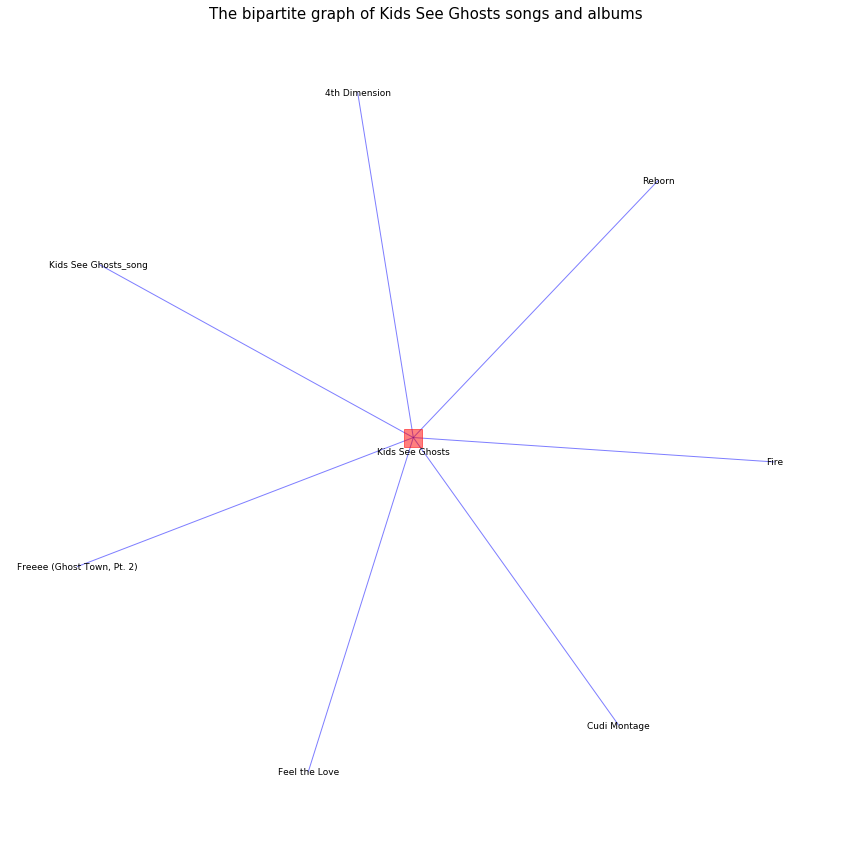

In [63]:
figsize=(15,15)

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=list(albums),node_color="r",node_shape='s',alpha=0.5)#"#ffb3b3"
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=list(songs),node_size=0,node_color="g",node_shape='o',alpha=0.5)#"#b3ffb3"
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.04  # offset on the y axis
for k, v in pos.items():
    if k in albums:
        yoffset[k] = (v[0], v[1]+y_off)
    else:
        yoffset[k] = v
nx.draw_networkx_labels(H, yoffset,font_size=9);
sst="The bipartite graph of %s songs and albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### 4.2. The intersection graph of albums in the songs that they contain

In [64]:
aed=[]
for a1 in albums:
    for a2 in albums:
        if a2!=a1:
            t=[]
            for s in songs:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting albums containing common songs has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))

The graph HA connecting albums containing common songs has: 
 0 nodes and 0 edges
Is HA weighted? False


In [65]:
# no co-occurent songs in albums

# weight=nx.get_edge_attributes(HA,'weight')
# weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
# weight_list

# cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
# edge_color=weight_list
# vmin = min(edge_color) 
# vmax = max(edge_color) 
# width_list=[0.6*w for w in weight_list] # [math.log(1+w) for w in weight_list]

# plt.figure(figsize=(10,7));
# pos = nx.spring_layout(HA, k=15, iterations=200) #graphviz_layout(HA)
# node_border_color='k'
# nodes = nx.draw_networkx_nodes(HA, pos=pos,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
# nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
# # nx.draw_networkx_edge_labels(HA,pos=pos,edge_labels=weight);
# plt.axis('off');
# yoffset = {}
# y_off = -0.08  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(HA, yoffset);
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm.set_array([])
# cbar = plt.colorbar(sm,label="Common Songs") #, orientation='horizontal')
# plt.tight_layout(-5)
# sst="The intersection graph of %s albums" %artist
# plt.title(sst,fontsize=15);
# plt.margins(x=0.2, y=0.1) 

### 4.3. The graph of co-occurring songs in the albums

In [66]:
aed=[]
for a1 in songs:
    for a2 in songs:
        if a2!=a1:
            t=[]
            for s in albums:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting songs co-occurring in albums has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))
      

The graph HA connecting songs co-occurring in albums has: 
 7 nodes and 21 edges
Is HA weighted? True


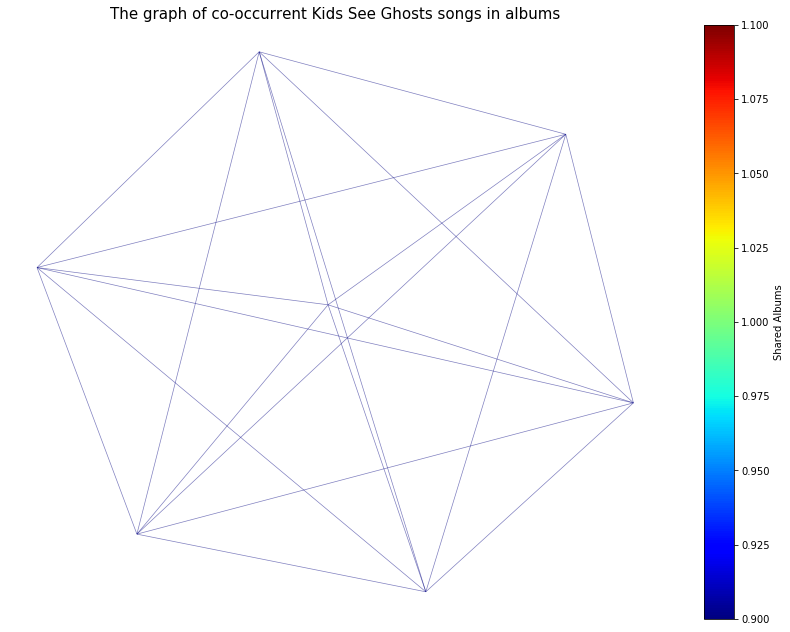

In [67]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

plt.figure(figsize=(10,7));
pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);

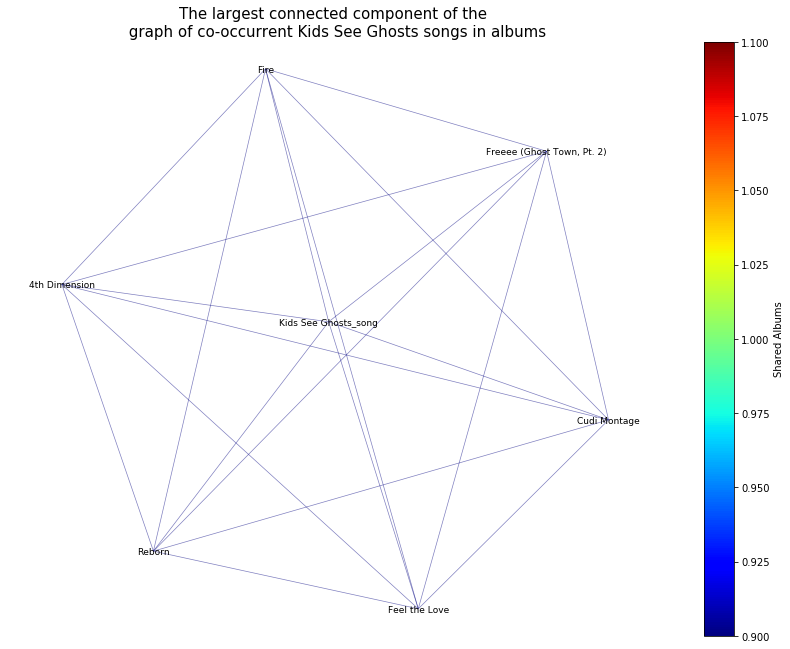

In [68]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

giant = max(connected_component_subgraphs(HA), key=len)
plt.figure(figsize=(10,7));
HA=giant
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset,font_size=9,);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The largest connected component of the \n graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 

In [69]:
artist_name_saved = artist.replace(' ','_')
ldf.to_csv(artist_name_saved+'_discography.csv',index=False)

In [70]:
ldf4 = pd.read_csv(artist_name_saved+'_discography.csv') #,encoding='utf-8',index=False
# ldf1 = ldf1[['artist', 'lyric', 'song', 'year', 'album', 'id', 'genre',
#        'album_genre']]
ldf4

song            album  year                  albumy  \
0               4th Dimension  Kids See Ghosts  2018  Kids See Ghosts (2018)   
1                Cudi Montage  Kids See Ghosts  2018  Kids See Ghosts (2018)   
2               Feel the Love  Kids See Ghosts  2018  Kids See Ghosts (2018)   
3                        Fire  Kids See Ghosts  2018  Kids See Ghosts (2018)   
4  Freeee (Ghost Town, Pt. 2)  Kids See Ghosts  2018  Kids See Ghosts (2018)   
5             Kids See Ghosts  Kids See Ghosts  2018  Kids See Ghosts (2018)   
6                      Reborn  Kids See Ghosts  2018  Kids See Ghosts (2018)   

                                               lyric  
0  "Down the chimney, he will come With his great...  
1  Find my back in the cold Trapped in another so...  
2  I can still feel the love I can still feel the...  
3  I love all your shit talkin', I love all your ...  
4  May I say something to you to give you a true ...  
5  Kids see ghosts sometimes Kids see ghosts some...  
6  I'm so-I'm so reborn, I'm movin' forward Keep ...

In [71]:
songs4 = sorted(set(ldf4.song.tolist()))
print(len(songs4),len(ldf4))
songs4

7 7


['4th Dimension',
 'Cudi Montage',
 'Feel the Love',
 'Fire',
 'Freeee (Ghost Town, Pt. 2)',
 'Kids See Ghosts',
 'Reborn']

In [72]:
for i in range(len(ldf4)):
    a = artist_name_saved
    b = ldf4.iloc[i]['lyric']
    c = ldf4.iloc[i]['song']
    if c in songs4:
        docs_d[c] = (a,b)

In [73]:
for k,v in docs_d.items():
    print(k,v)

30 Hours ('Kanye_West', "Baby lion goes Where the islands go You say you never saw this comin', well you're not alone Million dollar renovations to a happy home My ex says she gave me the best years of her life I saw a recent picture of her, I guess she was right I wake up, assessin' the damages Checkin' MediaTakeOut Pictures of me drunk walkin' out with a bitch But it's blurry enough to get the fake out I wake up, all veggies no eggs I hit the gym, all chest no legs Yep, then I made myself a smoothie Yeah, then me and wifey make a movie Chicago - St. Louis, St. Louis to Chicago Ándale Ándale E.I, E.I, uh, oh You had me drivin' far enough to switch the time zone You was the best of all time at the time though Yeah, you wasn't mine though But I still drove 30 hours But still drove 30 hours to you I remember rapping for Jay and Cam Young producer just trying to get his flows off I remember being nervous to do Victoria Secret Till I pictured everybody with they clothes off Expedition was 

### 5 The Throne (Kanye West and Jay-Z)

In [74]:
artist='The Throne'

In [75]:
ldf = throne_ldf.reset_index()
ldf

index                       song             album  year  \
0      87              Gotta Have It  Watch the Throne  2011   
1     106                      H•A•M  Watch the Throne  2011   
2     115  Illest Motherfucker Alive  Watch the Throne  2011   
3     136                   Lift Off  Watch the Throne  2011   
4     140            Made in America  Watch the Throne  2011   
5     149       Murder to Excellence  Watch the Throne  2011   
6     155                    New Day  Watch the Throne  2011   
7     159            Niggas in Paris  Watch the Throne  2011   
8     160      No Church in the Wild  Watch the Throne  2011   
9     168                       Otis  Watch the Throne  2011   
10    180                  Primetime  Watch the Throne  2011   
11    218            That's My Bitch  Watch the Throne  2011   
12    221                    The Joy  Watch the Throne  2011   
13    242      Welcome to the Jungle  Watch the Throne  2011   
14    250            Who Gon Stop Me  Watch the Throne  2011   
15    252             Why I Love You  Watch the Throne  2011   

                     albumy                                              lyric  
0   Watch the Throne (2011)  Turn my headphones up Louder Uh-huh, uh-huh Wh...  
1   Watch the Throne (2011)  (Verse 1: Kanye West) It was all good just a w...  
2   Watch the Throne (2011)  *3 Minute Pause* (Intro: Kanye West) 1985 whit...  
3   Watch the Throne (2011)  All engine running We gon' take it to the moon...  
4   Watch the Throne (2011)  It'll bring you out the, out the darkness Swee...  
5   Watch the Throne (2011)  Uh, bloody murder, murder, murder Bloody murde...  
6   Watch the Throne (2011)  Yeah, uh (Sun in the sky, you know how I feel)...  
7   Watch the Throne (2011)  We're gonna skate to one song, one song only B...  
8   Watch the Throne (2011)  Human beings in a mob What's a mob to a king? ...  
9   Watch the Throne (2011)  It makes it easier, easier to bear You won't r...  
10  Watch the Throne (2011)  (Intro: Jay-Z) We in the time of our lives, ba...  
11  Watch the Throne (2011)  Hello, can I speak to, uh Yeah, you know who y...  
12  Watch the Throne (2011)  A little sugar, honey suckle lamb A grave expr...  
13  Watch the Throne (2011)  Uh Right Oh Oh Right One, two (Yeah), one, two...  
14  Watch the Throne (2011)  I can't stop I can't stop This is something li...  
15  Watch the Throne (2011)  Ooh, I love you so But why I love you, I'll ne...

In [76]:
ldf = ldf.drop('index',axis=1)
ldf

song             album  year  \
0               Gotta Have It  Watch the Throne  2011   
1                       H•A•M  Watch the Throne  2011   
2   Illest Motherfucker Alive  Watch the Throne  2011   
3                    Lift Off  Watch the Throne  2011   
4             Made in America  Watch the Throne  2011   
5        Murder to Excellence  Watch the Throne  2011   
6                     New Day  Watch the Throne  2011   
7             Niggas in Paris  Watch the Throne  2011   
8       No Church in the Wild  Watch the Throne  2011   
9                        Otis  Watch the Throne  2011   
10                  Primetime  Watch the Throne  2011   
11            That's My Bitch  Watch the Throne  2011   
12                    The Joy  Watch the Throne  2011   
13      Welcome to the Jungle  Watch the Throne  2011   
14            Who Gon Stop Me  Watch the Throne  2011   
15             Why I Love You  Watch the Throne  2011   

                     albumy                                              lyric  
0   Watch the Throne (2011)  Turn my headphones up Louder Uh-huh, uh-huh Wh...  
1   Watch the Throne (2011)  (Verse 1: Kanye West) It was all good just a w...  
2   Watch the Throne (2011)  *3 Minute Pause* (Intro: Kanye West) 1985 whit...  
3   Watch the Throne (2011)  All engine running We gon' take it to the moon...  
4   Watch the Throne (2011)  It'll bring you out the, out the darkness Swee...  
5   Watch the Throne (2011)  Uh, bloody murder, murder, murder Bloody murde...  
6   Watch the Throne (2011)  Yeah, uh (Sun in the sky, you know how I feel)...  
7   Watch the Throne (2011)  We're gonna skate to one song, one song only B...  
8   Watch the Throne (2011)  Human beings in a mob What's a mob to a king? ...  
9   Watch the Throne (2011)  It makes it easier, easier to bear You won't r...  
10  Watch the Throne (2011)  (Intro: Jay-Z) We in the time of our lives, ba...  
11  Watch the Throne (2011)  Hello, can I speak to, uh Yeah, you know who y...  
12  Watch the Throne (2011)  A little sugar, honey suckle lamb A grave expr...  
13  Watch the Throne (2011)  Uh Right Oh Oh Right One, two (Yeah), one, two...  
14  Watch the Throne (2011)  I can't stop I can't stop This is something li...  
15  Watch the Throne (2011)  Ooh, I love you so But why I love you, I'll ne...

In [77]:
lg=ldf["song"].groupby(ldf["albumy"]).count()
lg=lg.reset_index()
lg.rename(columns={'song': 'number of songs'}, inplace=True)
lg

albumy  number of songs
0  Watch the Throne (2011)               16

### 5.1. The bipartite graph of songs and albums

In [78]:
sae=[]
for i in range(len(ldf)):
    s=ldf.iloc[i]['song']
    a=ldf.iloc[i]['album']
    y=ldf.iloc[i]['year']
    ly=ldf.iloc[i]['lyric']
    sae.append((s,a,y,ly))
saed=[]
for t in sae:
    year_l={'year_l':(t[2],t[3])}
    if t[0] not in ldf.album.unique():
        saed.append((t[0],t[1],year_l)) #,lyric))
    else:
        saed.append((t[0]+"_song",t[1],year_l))
saed=sorted(saed)
albums=list(set(ldf.album.values))
# songs=set(ldf.song.values)
t1=[]
t11=[]
t2=[]
for a in albums:
    for s in ldf.song.unique():
        if s==a:
            t11.append(s)
            ss=s+"_song"
            if ss not in t1:
                t1.append(ss)
for s in ldf.song.unique():
     if s not in t11:
        t2.append(s)
songs=t1+t2
for i in songs:
    if i in albums:
        print(i)
H=nx.MultiGraph()
H.add_edges_from(saed)
print("The graph H connecting the %i songs to the %i albums has: \n %i nodes and %i edges" %(len(songs),len(albums),len(H.nodes()),len(H.edges())))
print("Is H multigraph?", H.is_multigraph())
print("Is H bipartite?", nx.is_bipartite(H))

The graph H connecting the 16 songs to the 1 albums has: 
 17 nodes and 16 edges
Is H multigraph? True
Is H bipartite? True


In [79]:
pos = nx.spring_layout(H, k=15.,iterations=1000)
r=0.3 #26
Ga=nx.Graph()
Ga.add_nodes_from(albums)
posalb=nx.circular_layout(Ga)
for a in albums:
    pos[a]=(r*posalb[a][0],r*posalb[a][1])

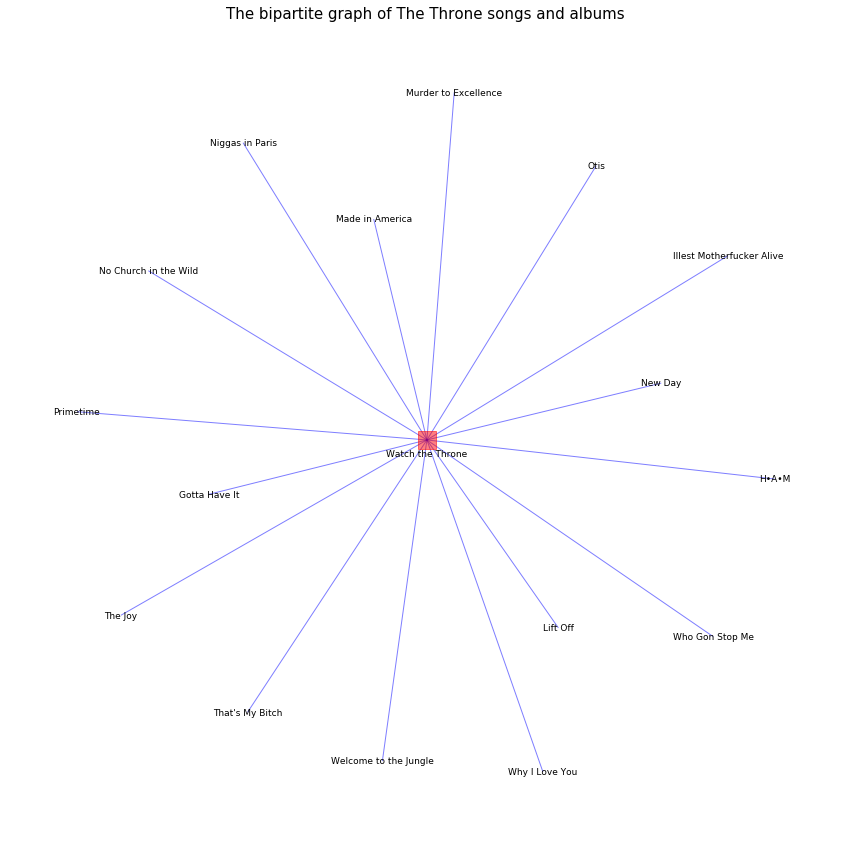

In [80]:
figsize=(15,15)

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=list(albums),node_color="r",node_shape='s',alpha=0.5)#"#ffb3b3"
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=list(songs),node_size=0,node_color="g",node_shape='o',alpha=0.5)#"#b3ffb3"
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.04  # offset on the y axis
for k, v in pos.items():
    if k in albums:
        yoffset[k] = (v[0], v[1]+y_off)
    else:
        yoffset[k] = v
nx.draw_networkx_labels(H, yoffset,font_size=9);
sst="The bipartite graph of %s songs and albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### 5.2. The intersection graph of albums in the songs that they contain

In [81]:
aed=[]
for a1 in albums:
    for a2 in albums:
        if a2!=a1:
            t=[]
            for s in songs:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting albums containing common songs has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))

The graph HA connecting albums containing common songs has: 
 0 nodes and 0 edges
Is HA weighted? False


In [82]:
# no co-occurent songs in albums

# weight=nx.get_edge_attributes(HA,'weight')
# weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
# weight_list

# cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
# edge_color=weight_list
# vmin = min(edge_color) 
# vmax = max(edge_color) 
# width_list=[0.6*w for w in weight_list] # [math.log(1+w) for w in weight_list]

# plt.figure(figsize=(10,7));
# pos = nx.spring_layout(HA, k=15, iterations=200) #graphviz_layout(HA)
# node_border_color='k'
# nodes = nx.draw_networkx_nodes(HA, pos=pos,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
# nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
# # nx.draw_networkx_edge_labels(HA,pos=pos,edge_labels=weight);
# plt.axis('off');
# yoffset = {}
# y_off = -0.08  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(HA, yoffset);
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm.set_array([])
# cbar = plt.colorbar(sm,label="Common Songs") #, orientation='horizontal')
# plt.tight_layout(-5)
# sst="The intersection graph of %s albums" %artist
# plt.title(sst,fontsize=15);
# plt.margins(x=0.2, y=0.1) 

### 5.3. The graph of co-occurring songs in the albums

In [83]:
aed=[]
for a1 in songs:
    for a2 in songs:
        if a2!=a1:
            t=[]
            for s in albums:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print("The graph HA connecting songs co-occurring in albums has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges())))
print("Is HA weighted?", nx.is_weighted(HA))

The graph HA connecting songs co-occurring in albums has: 
 16 nodes and 120 edges
Is HA weighted? True


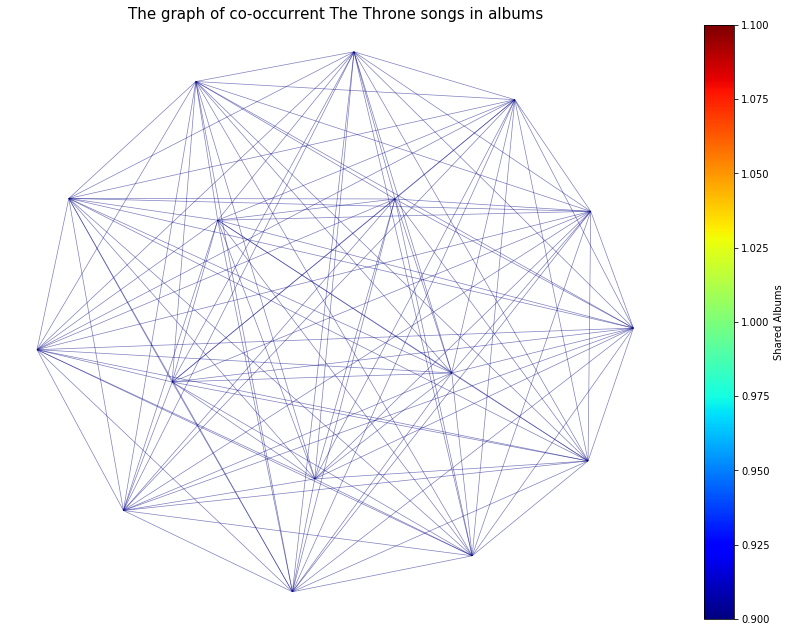

In [84]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

plt.figure(figsize=(10,7));
pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);

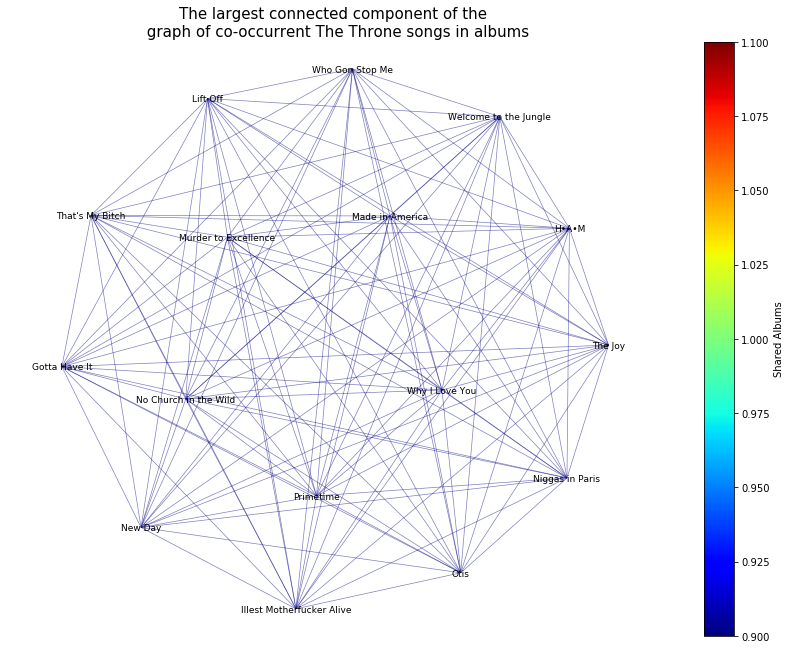

In [85]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

giant = max(connected_component_subgraphs(HA), key=len)
plt.figure(figsize=(10,7));
HA=giant
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset,font_size=9,);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The largest connected component of the \n graph of co-occurrent %s songs in albums" %artist
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 

In [86]:
artist_name_saved = artist.replace(' ','_')
ldf.to_csv(artist_name_saved+'_discography.csv',index=False)

In [87]:
ldf5 = pd.read_csv(artist_name_saved+'_discography.csv') #,encoding='utf-8',index=False
# ldf1 = ldf1[['artist', 'lyric', 'song', 'year', 'album', 'id', 'genre',
#        'album_genre']]
ldf5

song             album  year  \
0               Gotta Have It  Watch the Throne  2011   
1                       H•A•M  Watch the Throne  2011   
2   Illest Motherfucker Alive  Watch the Throne  2011   
3                    Lift Off  Watch the Throne  2011   
4             Made in America  Watch the Throne  2011   
5        Murder to Excellence  Watch the Throne  2011   
6                     New Day  Watch the Throne  2011   
7             Niggas in Paris  Watch the Throne  2011   
8       No Church in the Wild  Watch the Throne  2011   
9                        Otis  Watch the Throne  2011   
10                  Primetime  Watch the Throne  2011   
11            That's My Bitch  Watch the Throne  2011   
12                    The Joy  Watch the Throne  2011   
13      Welcome to the Jungle  Watch the Throne  2011   
14            Who Gon Stop Me  Watch the Throne  2011   
15             Why I Love You  Watch the Throne  2011   

                     albumy                                              lyric  
0   Watch the Throne (2011)  Turn my headphones up Louder Uh-huh, uh-huh Wh...  
1   Watch the Throne (2011)  (Verse 1: Kanye West) It was all good just a w...  
2   Watch the Throne (2011)  *3 Minute Pause* (Intro: Kanye West) 1985 whit...  
3   Watch the Throne (2011)  All engine running We gon' take it to the moon...  
4   Watch the Throne (2011)  It'll bring you out the, out the darkness Swee...  
5   Watch the Throne (2011)  Uh, bloody murder, murder, murder Bloody murde...  
6   Watch the Throne (2011)  Yeah, uh (Sun in the sky, you know how I feel)...  
7   Watch the Throne (2011)  We're gonna skate to one song, one song only B...  
8   Watch the Throne (2011)  Human beings in a mob What's a mob to a king? ...  
9   Watch the Throne (2011)  It makes it easier, easier to bear You won't r...  
10  Watch the Throne (2011)  (Intro: Jay-Z) We in the time of our lives, ba...  
11  Watch the Throne (2011)  Hello, can I speak to, uh Yeah, you know who y...  
12  Watch the Throne (2011)  A little sugar, honey suckle lamb A grave expr...  
13  Watch the Throne (2011)  Uh Right Oh Oh Right One, two (Yeah), one, two...  
14  Watch the Throne (2011)  I can't stop I can't stop This is something li...  
15  Watch the Throne (2011)  Ooh, I love you so But why I love you, I'll ne...

In [88]:
songs5 = sorted(set(ldf5.song.tolist()))
print(len(songs5),len(ldf5))
songs5

16 16


['Gotta Have It',
 'H•A•M',
 'Illest Motherfucker Alive',
 'Lift Off',
 'Made in America',
 'Murder to Excellence',
 'New Day',
 'Niggas in Paris',
 'No Church in the Wild',
 'Otis',
 'Primetime',
 "That's My Bitch",
 'The Joy',
 'Welcome to the Jungle',
 'Who Gon Stop Me',
 'Why I Love You']

In [89]:
for i in range(len(ldf5)):
    a = artist_name_saved
    b = ldf5.iloc[i]['lyric']
    c = ldf5.iloc[i]['song']
    if c in songs5:
        docs_d[c] = (a,b)

In [92]:
with open('The_Throne_and_Kids_See_Ghosts_Lyrics.pic', 'wb') as outfile:
    pickle.dump(docs_d, outfile, protocol=pickle.HIGHEST_PROTOCOL)